In [109]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
df =pd.read_csv("data/NIFTY50_all.csv", header=0)
df

Date      Symbol    Open     High     Low   Close    Volume
0       11/27/2007  MUNDRAPORT  770.00  1050.00  770.00  962.90  27294366
1       11/28/2007  MUNDRAPORT  984.00   990.00  874.00  893.90   4581338
2       11/29/2007  MUNDRAPORT  909.00   914.75  841.00  884.20   5124121
3       11/30/2007  MUNDRAPORT  890.00   958.00  890.00  921.55   4609762
4        12/3/2007  MUNDRAPORT  939.75   995.00  922.00  969.30   2977470
...            ...         ...     ...      ...     ...     ...       ...
235187   4/26/2021        ZEEL  190.60   191.10  185.10  186.40   8542755
235188   4/27/2021        ZEEL  188.00   192.95  186.80  188.15  14247767
235189   4/28/2021        ZEEL  188.80   190.60  187.10  189.10   8429439
235190   4/29/2021        ZEEL  190.80   191.65  186.00  186.55   9483009
235191   4/30/2021        ZEEL  185.30   190.95  183.65  185.60  11435285

[235192 rows x 7 columns]

In [112]:
print(df.shape)

(235192, 7)


In [113]:
df.Symbol.unique()[0:20]

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH'], dtype=object)

In [114]:
print(len(df.Symbol.values))

235192


In [115]:
df.describe()

Open           High            Low          Close  \
count  235192.000000  235192.000000  235192.000000  235192.000000   
mean     1267.759708    1286.581440    1247.488465    1266.554351   
std      2585.259609    2619.649216    2546.621396    2582.140942   
min         8.500000       9.750000       8.500000       9.150000   
25%       275.000000     279.500000     269.600000     274.350000   
50%       567.025000     576.900000     556.500000     566.700000   
75%      1243.312500    1263.000000    1221.650000    1242.400000   
max     33399.950000   33480.000000   32468.100000   32861.950000   

             Volume  
count  2.351920e+05  
mean   3.045903e+06  
std    7.333981e+06  
min    3.000000e+00  
25%    2.190095e+05  
50%    1.010938e+06  
75%    3.019851e+06  
max    4.810589e+08

In [116]:
df.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [117]:
df.Date.unique()

array(['11/27/2007', '11/28/2007', '11/29/2007', ..., '11/22/2007',
       '11/23/2007', '11/26/2007'], dtype=object)

In [118]:
df["Symbol"].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [119]:
comp_plot = ['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL']
print(comp_plot)

['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY', 'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS', 'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE', 'ZEEL']


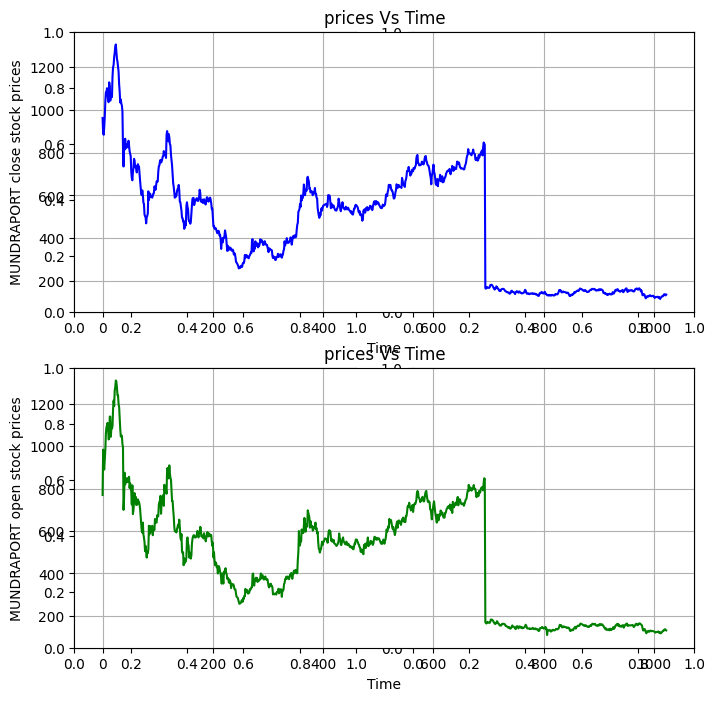

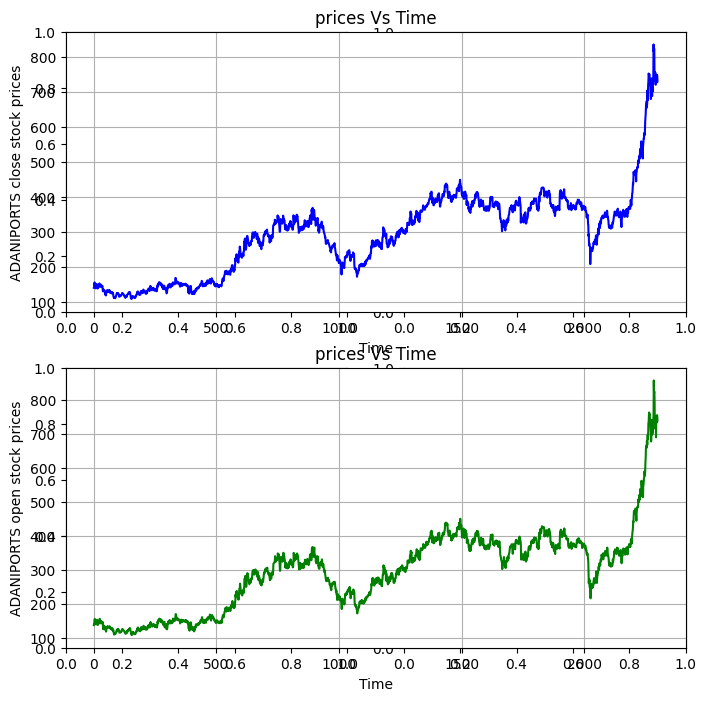

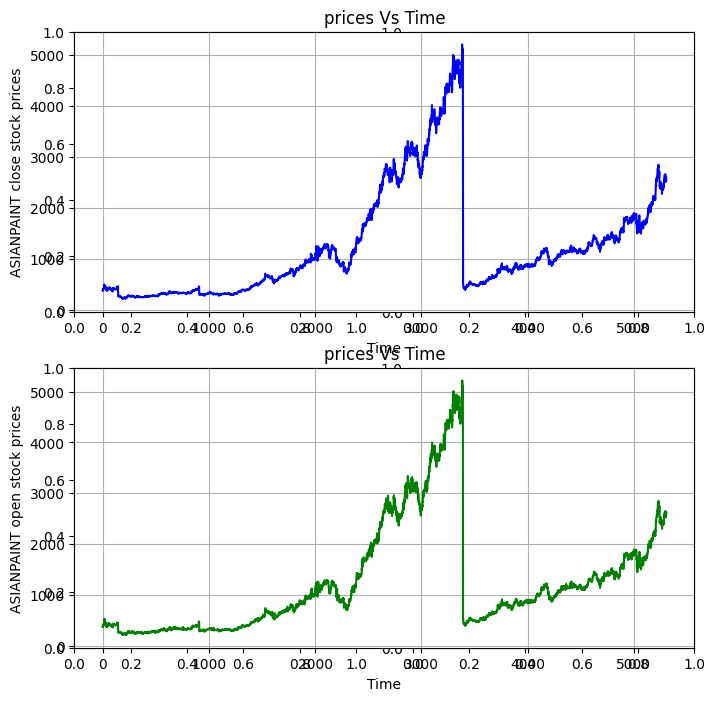

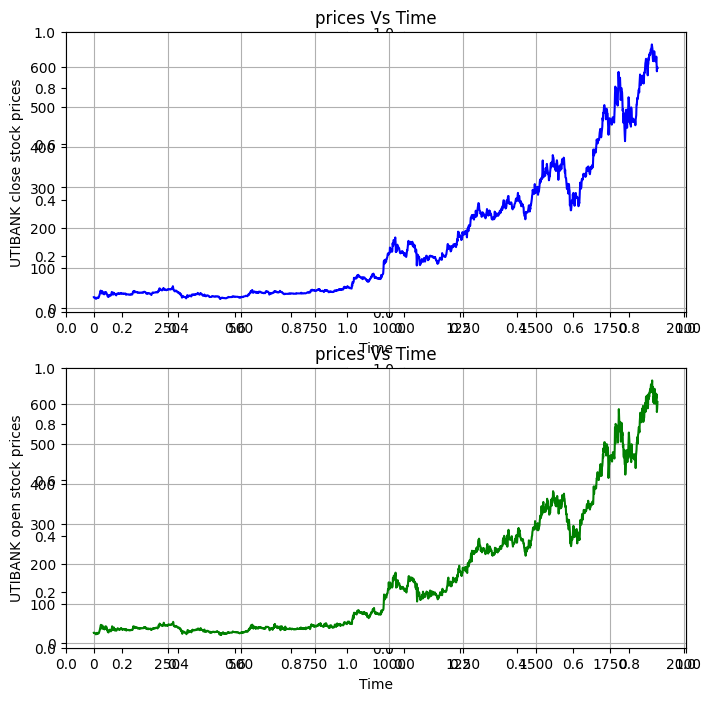

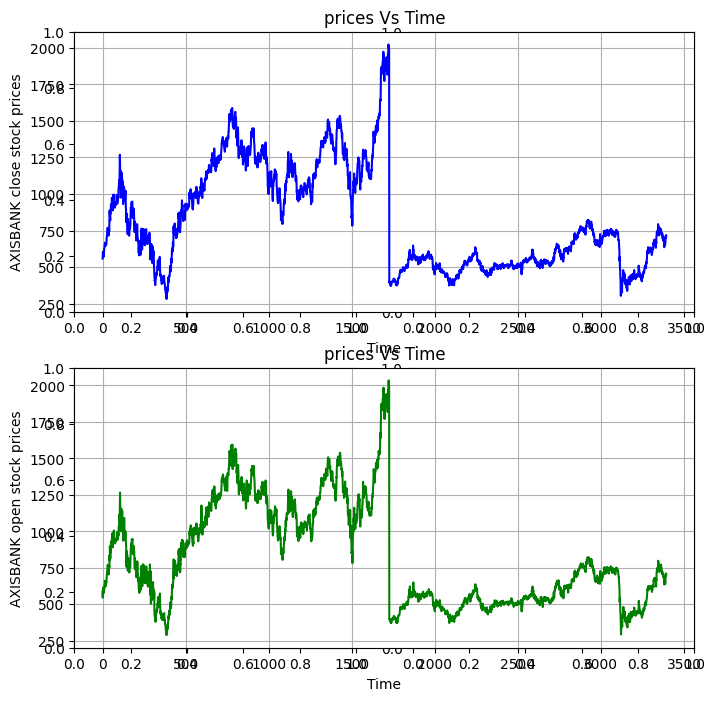

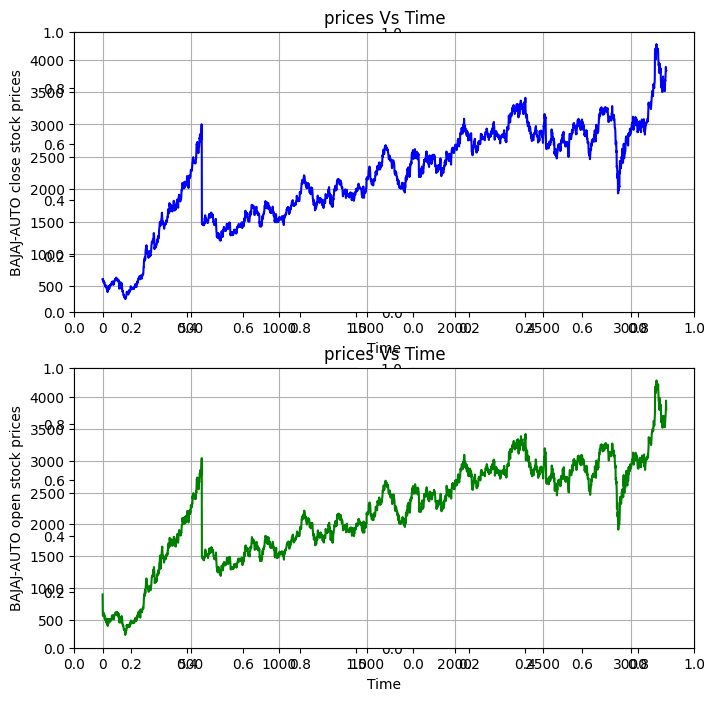

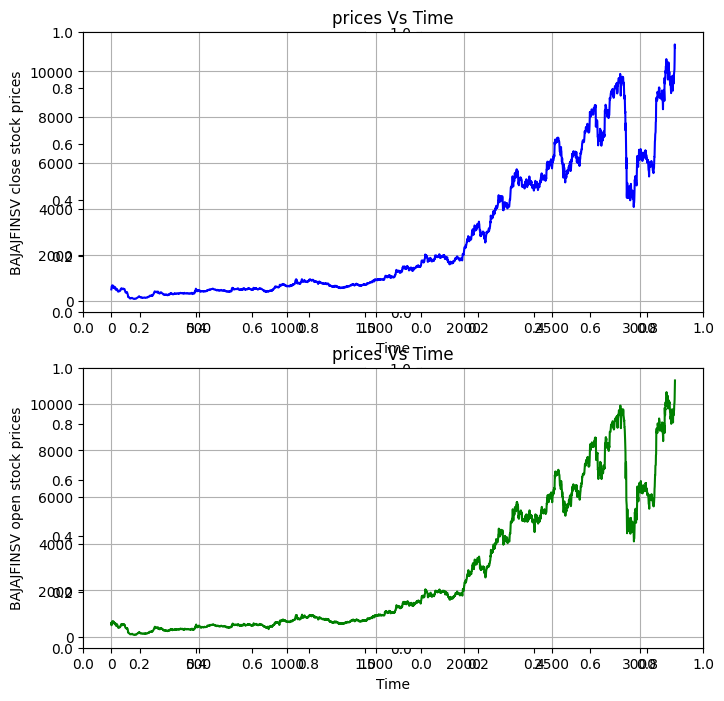

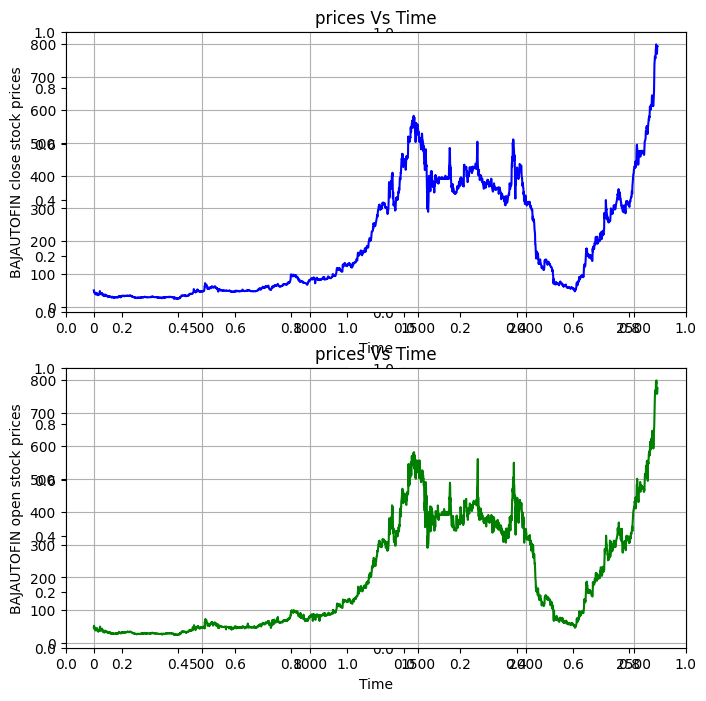

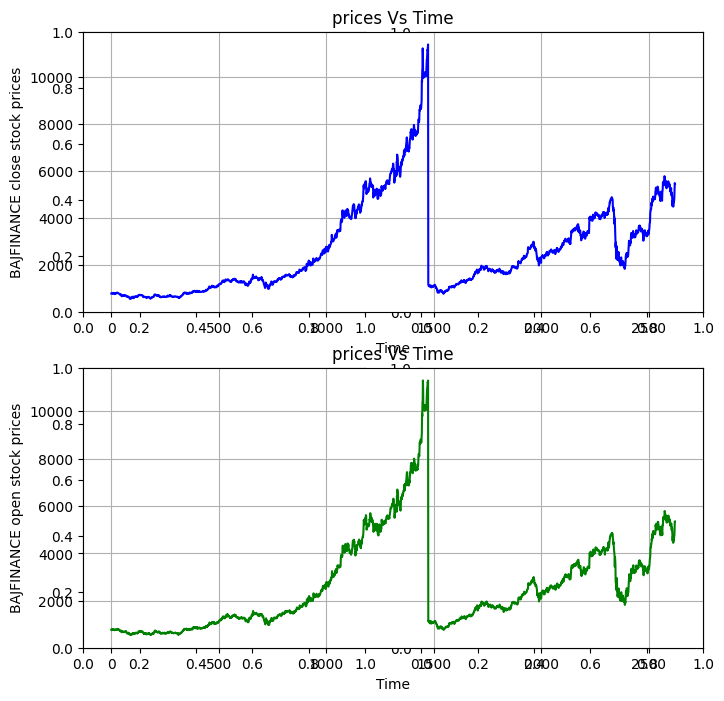

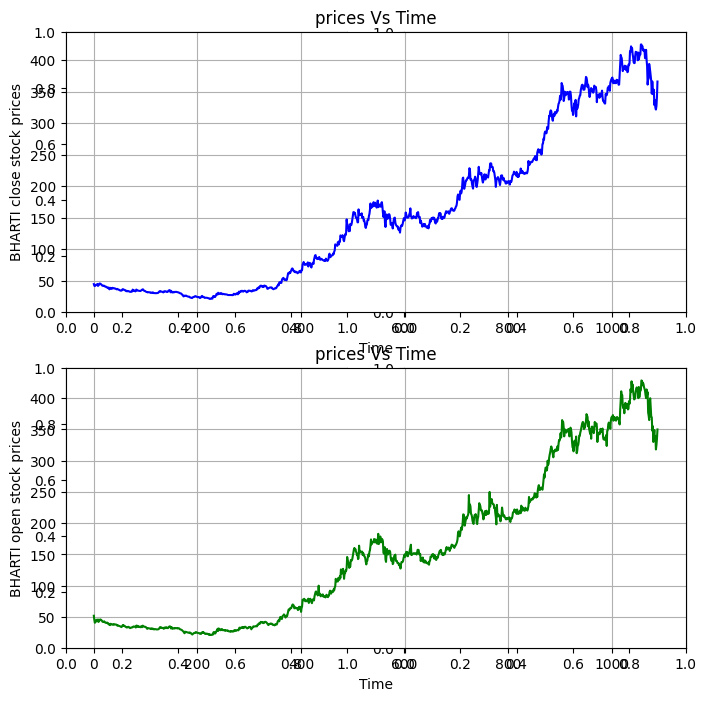

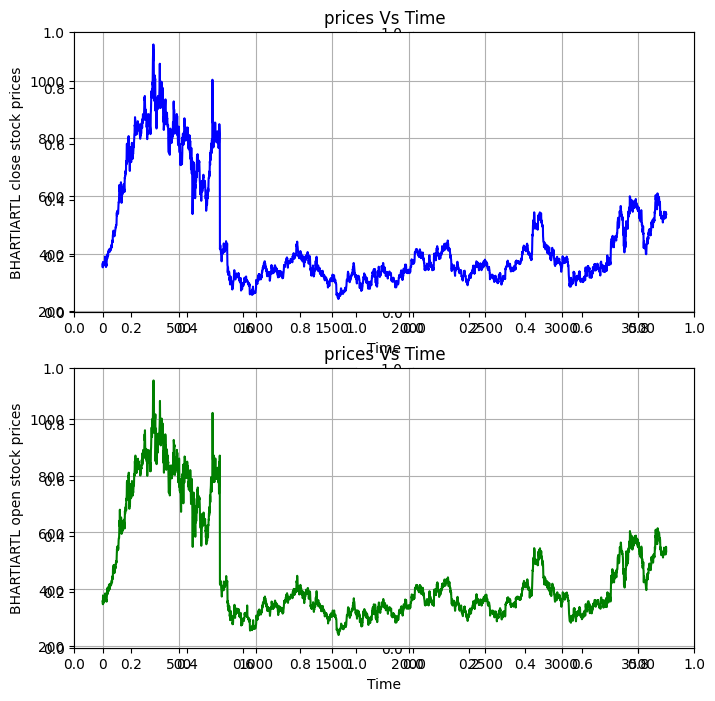

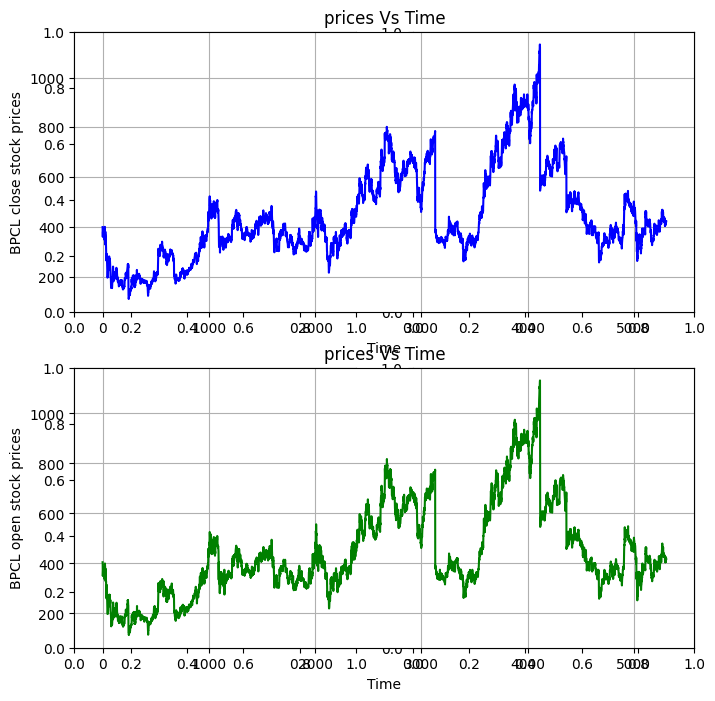

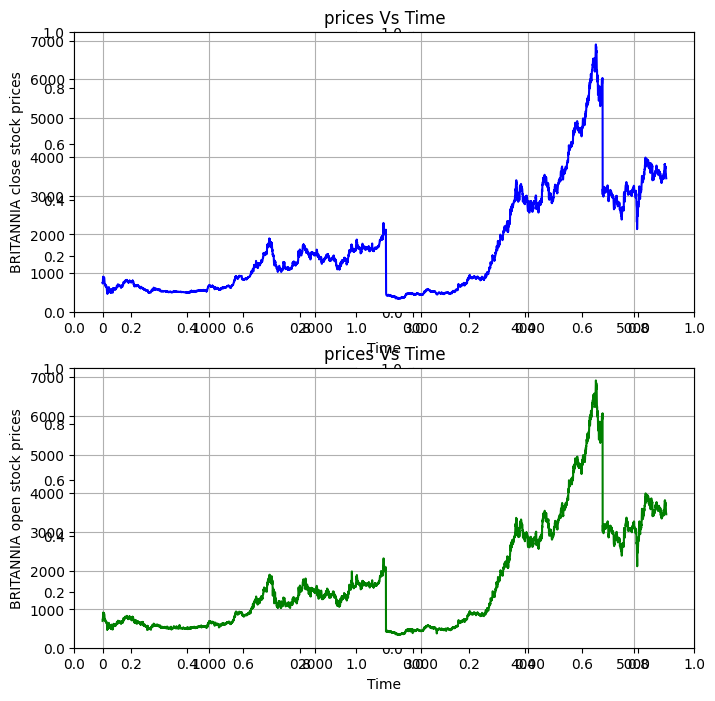

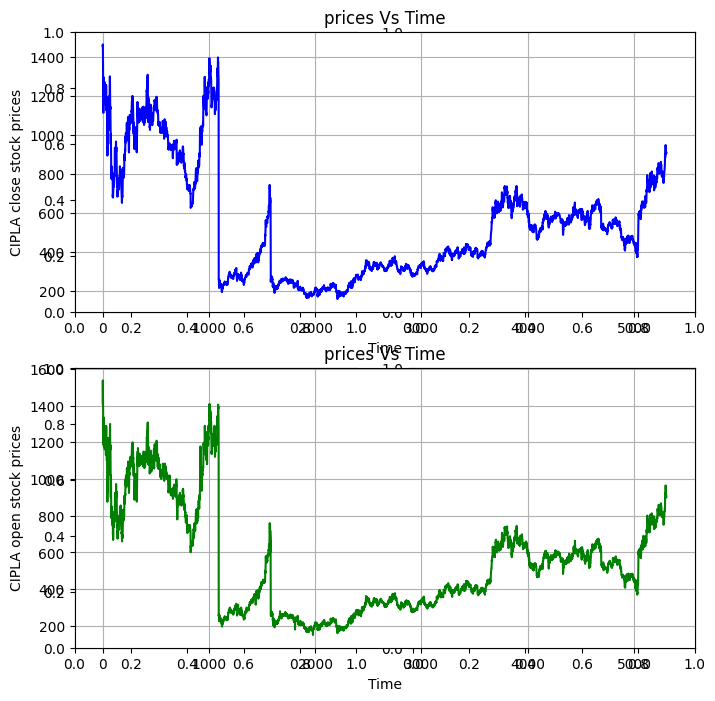

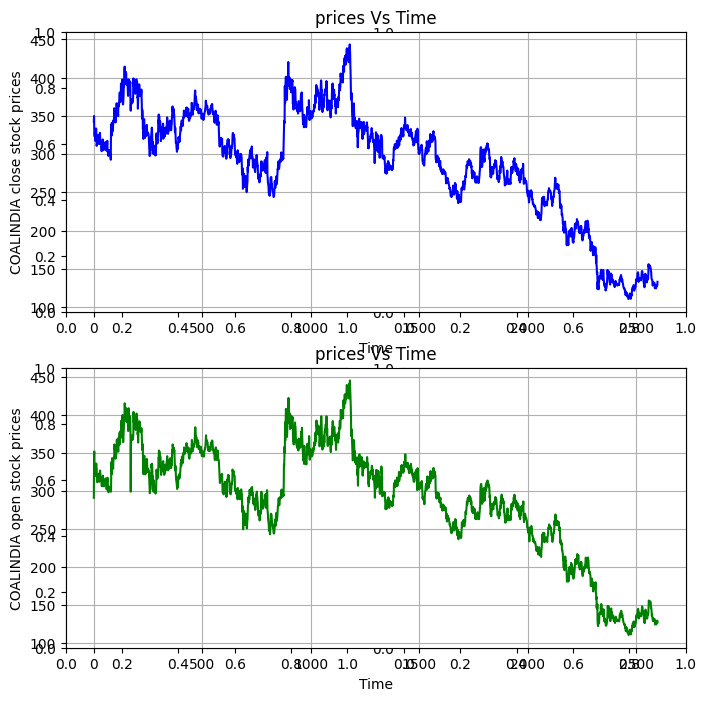

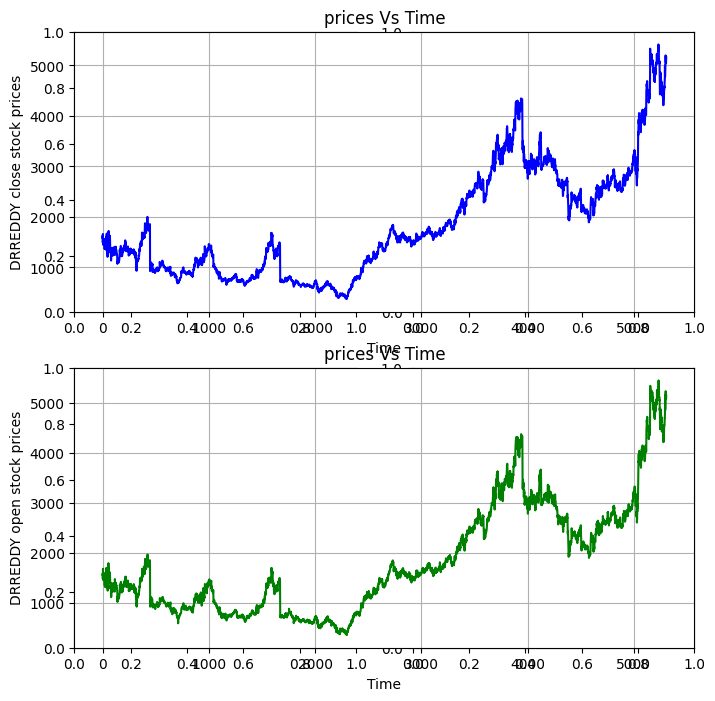

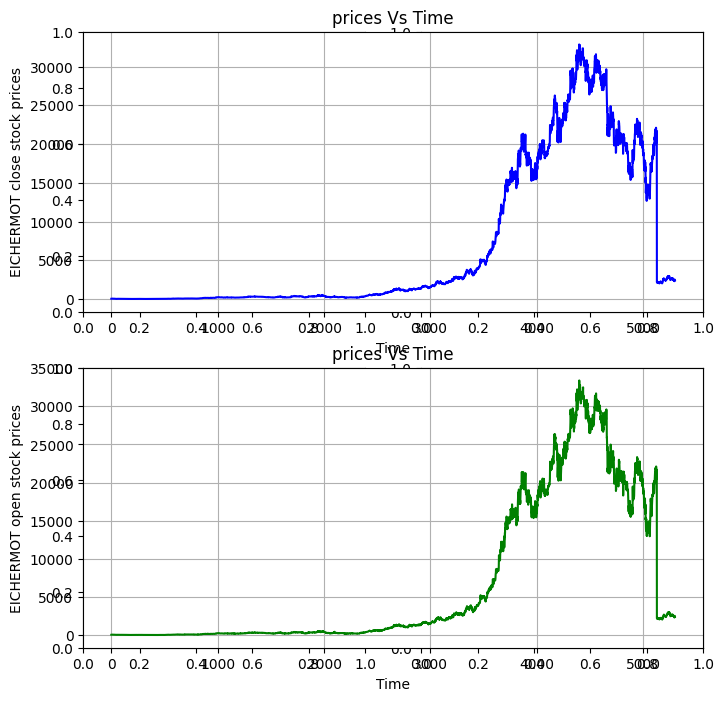

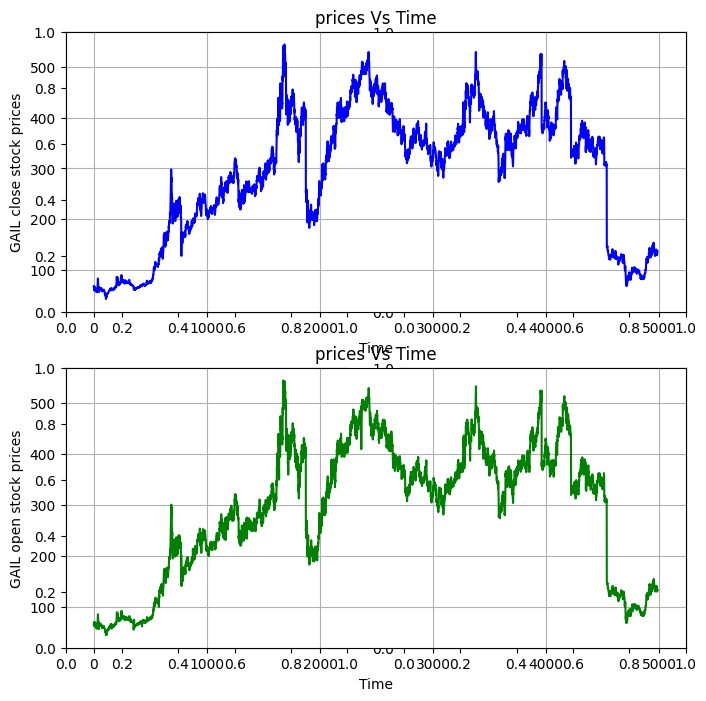

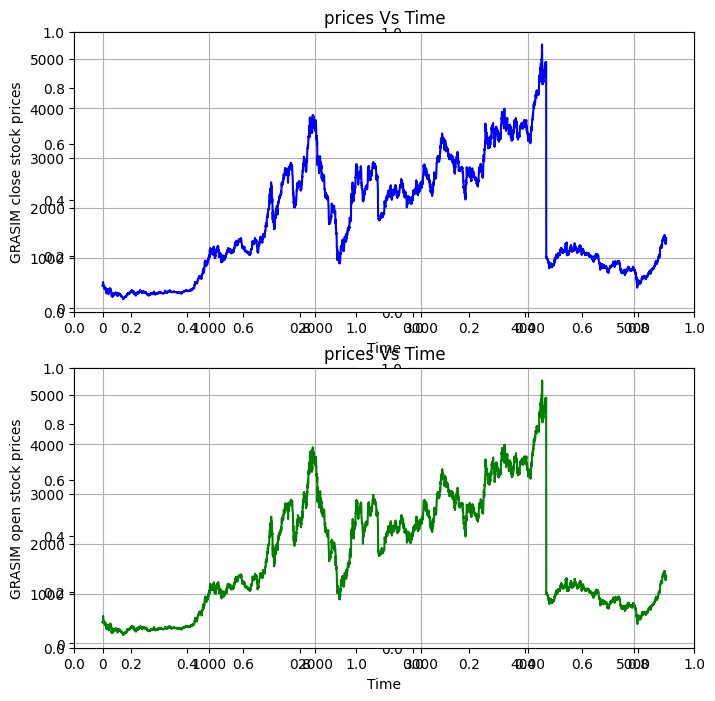

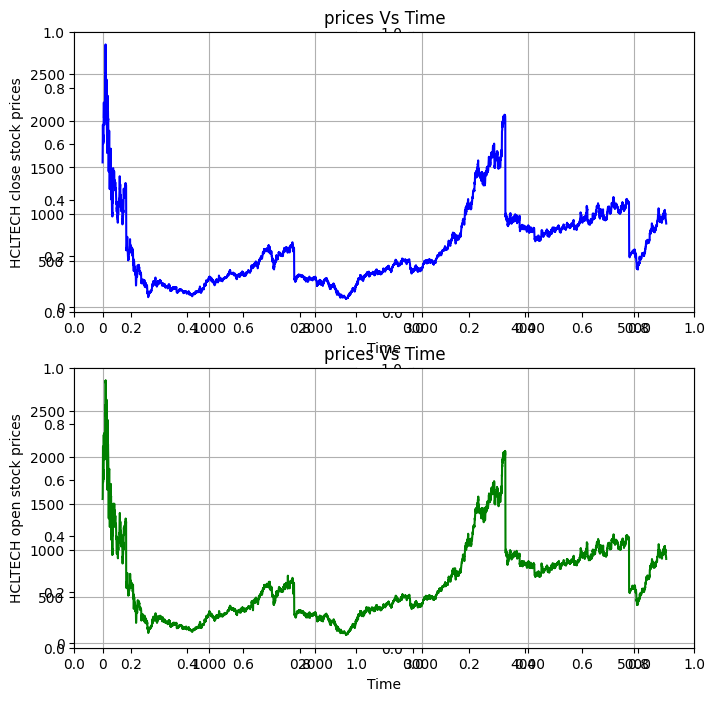

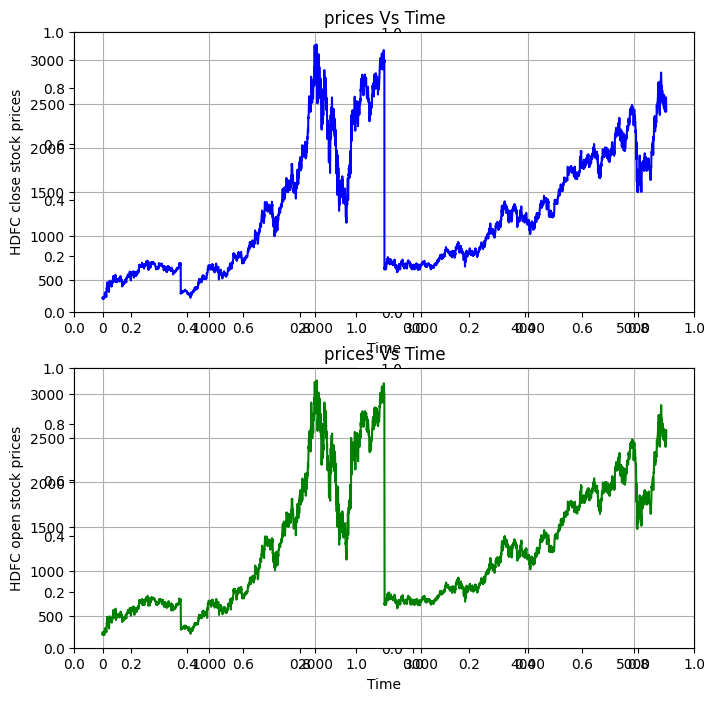

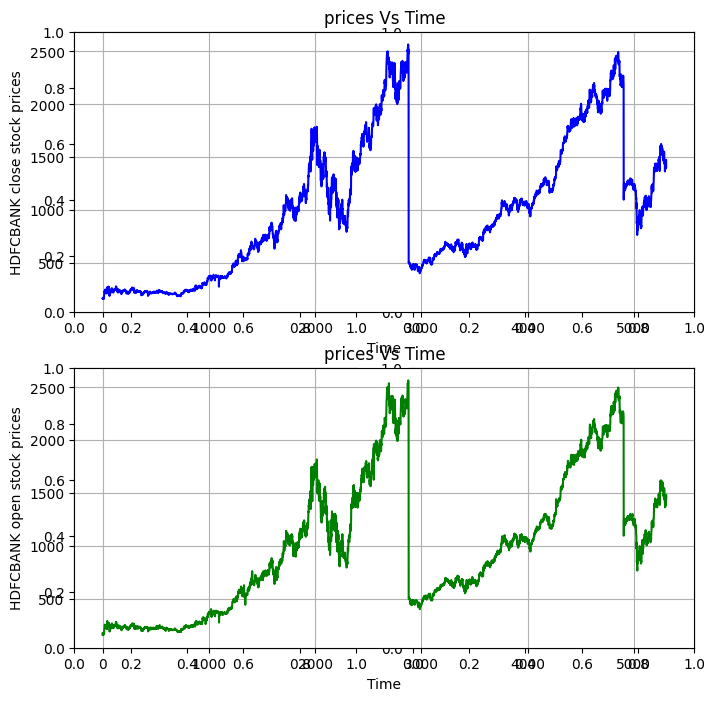

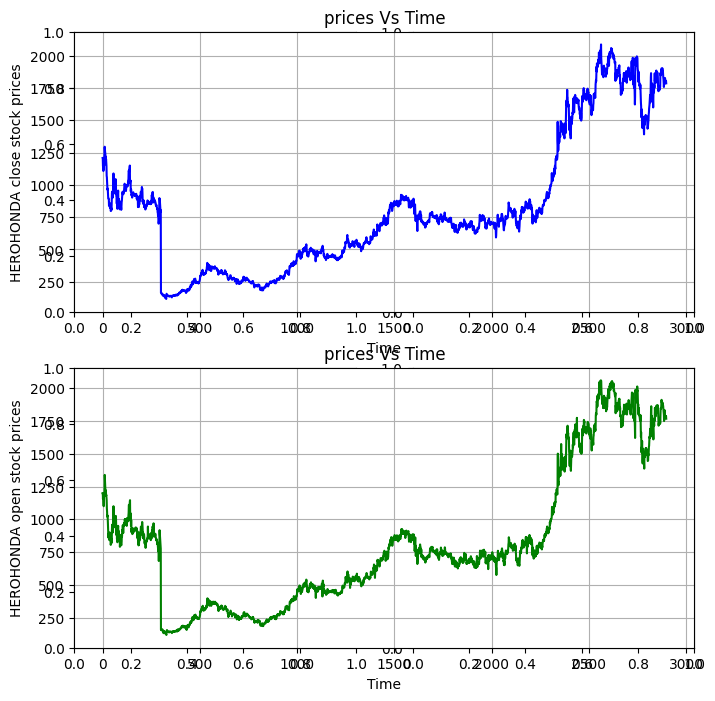

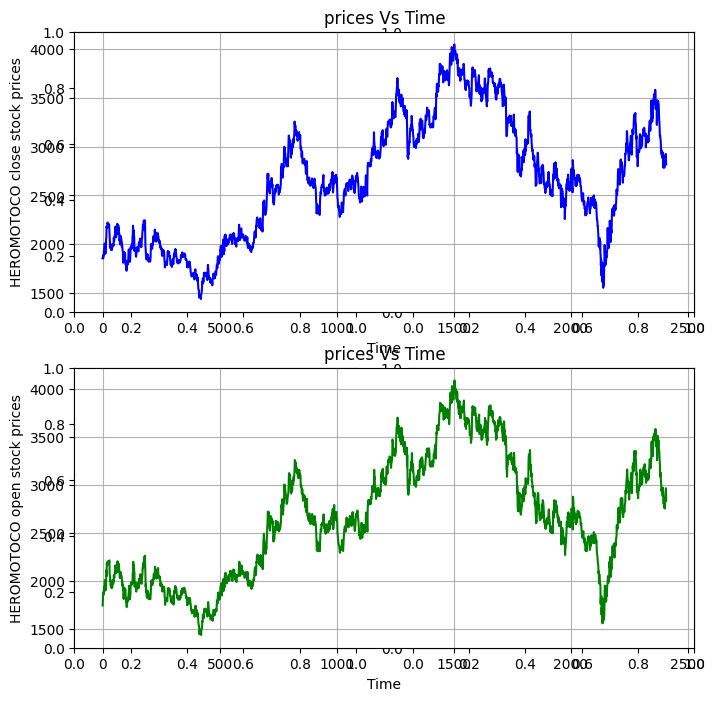

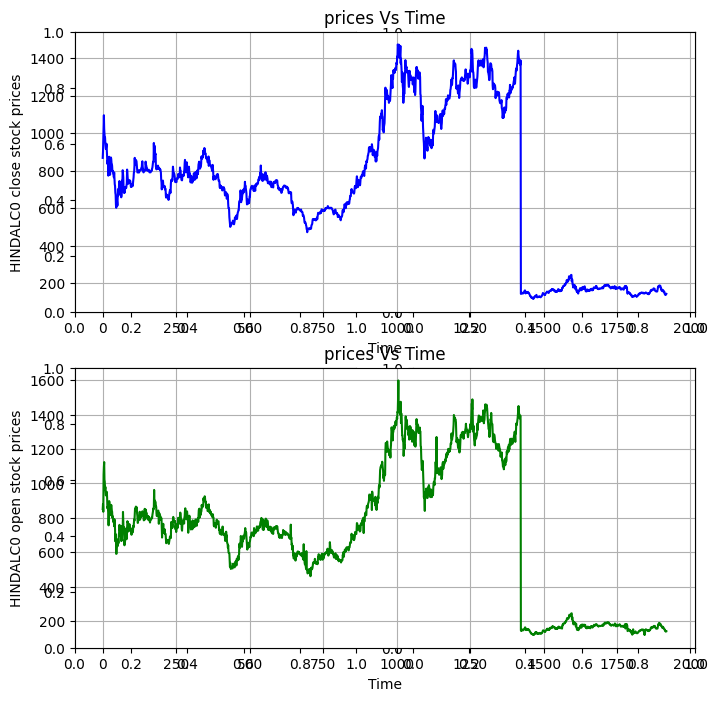

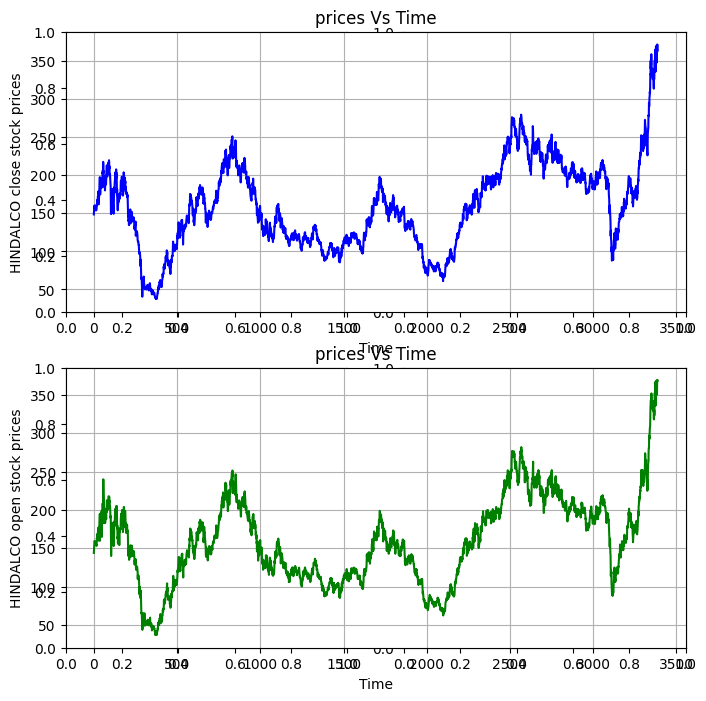

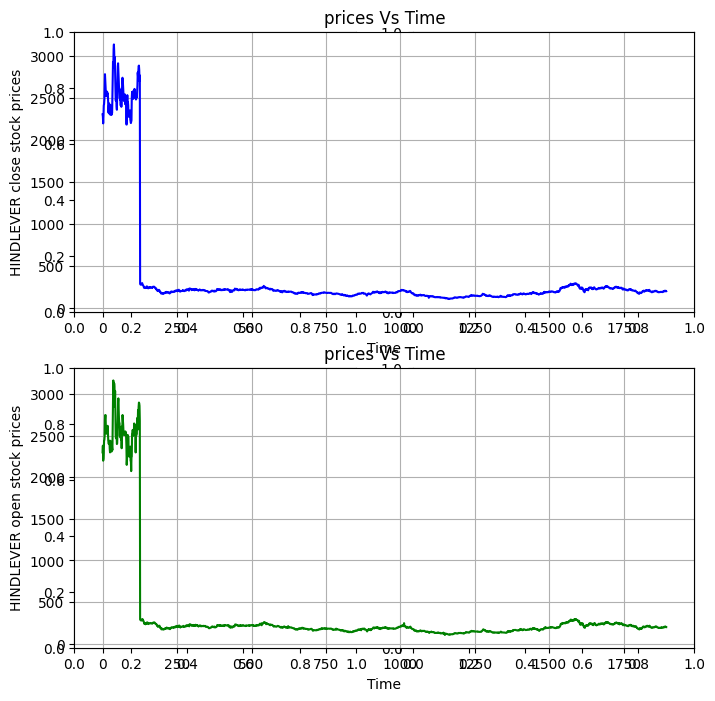

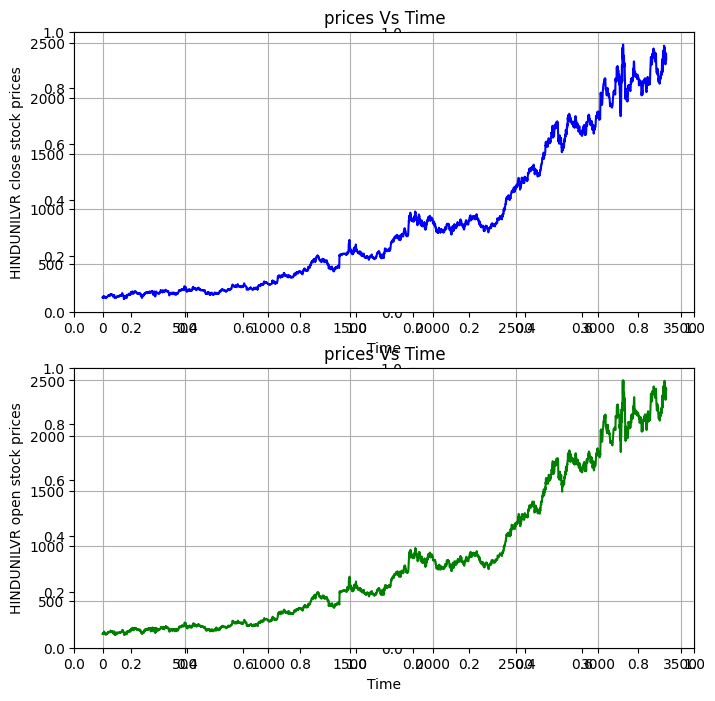

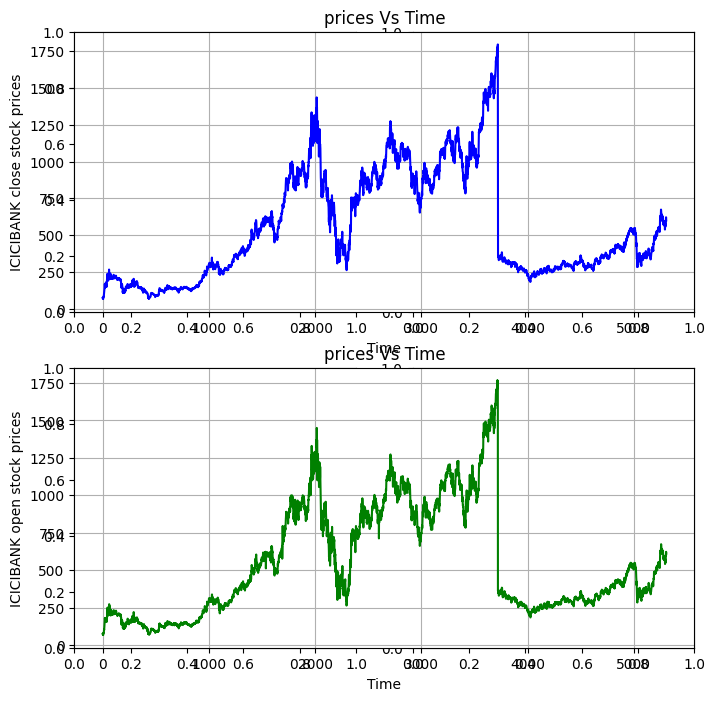

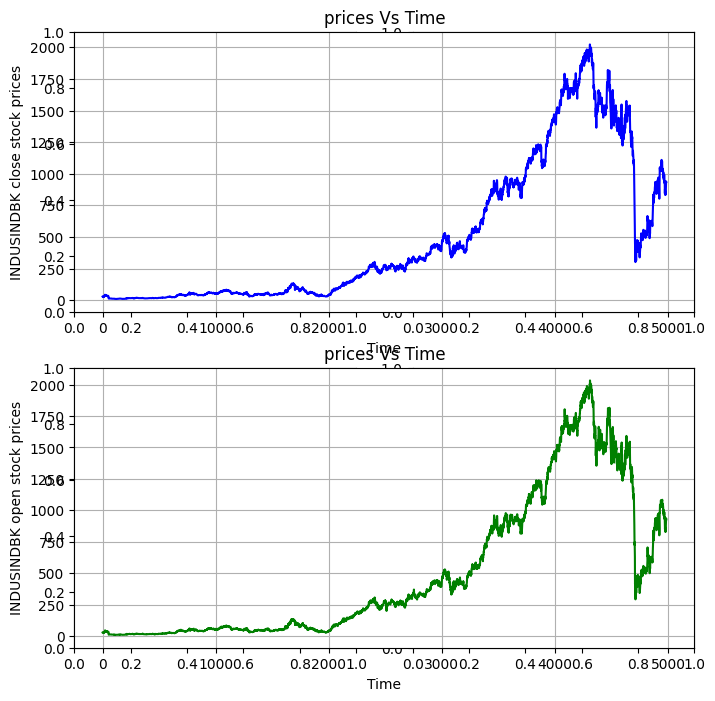

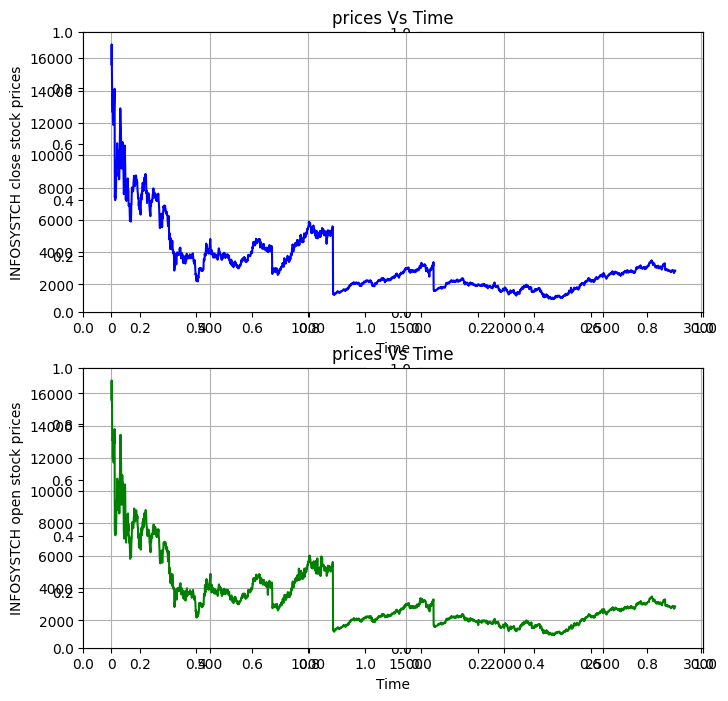

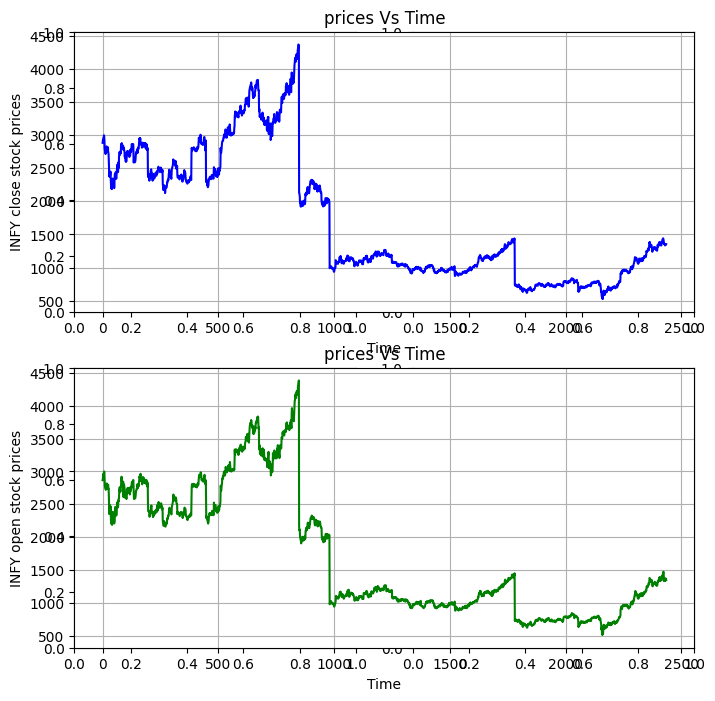

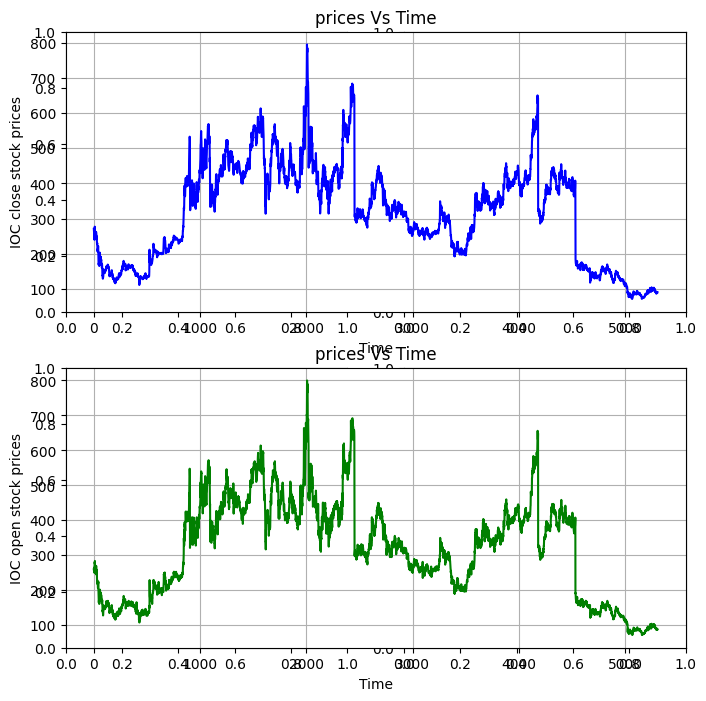

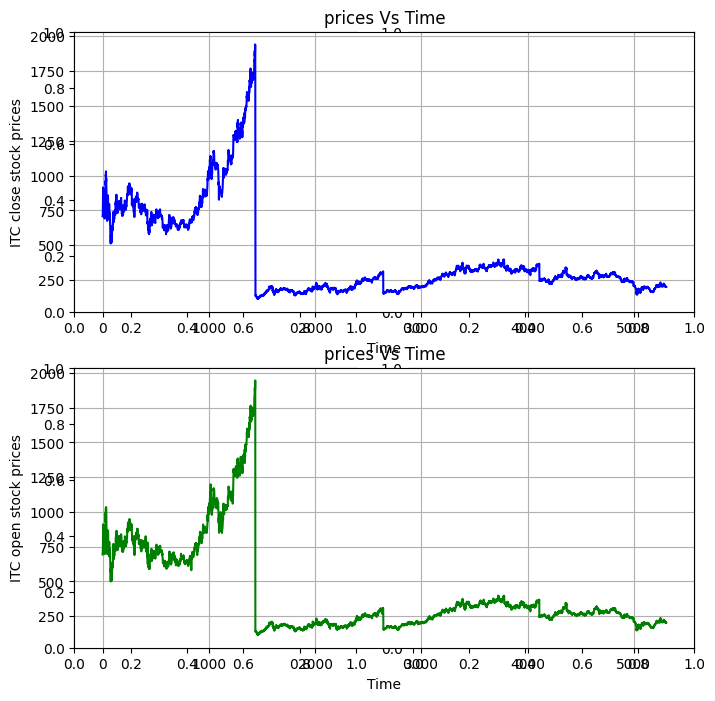

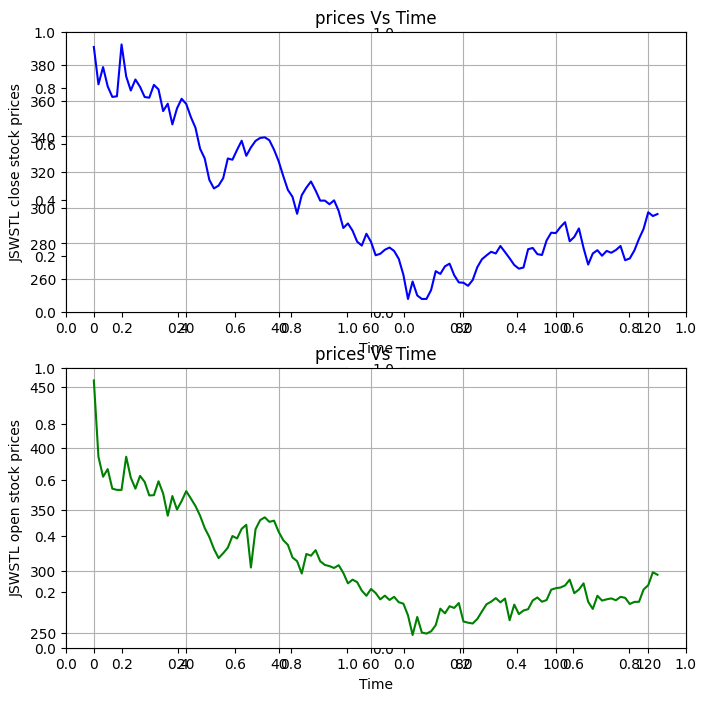

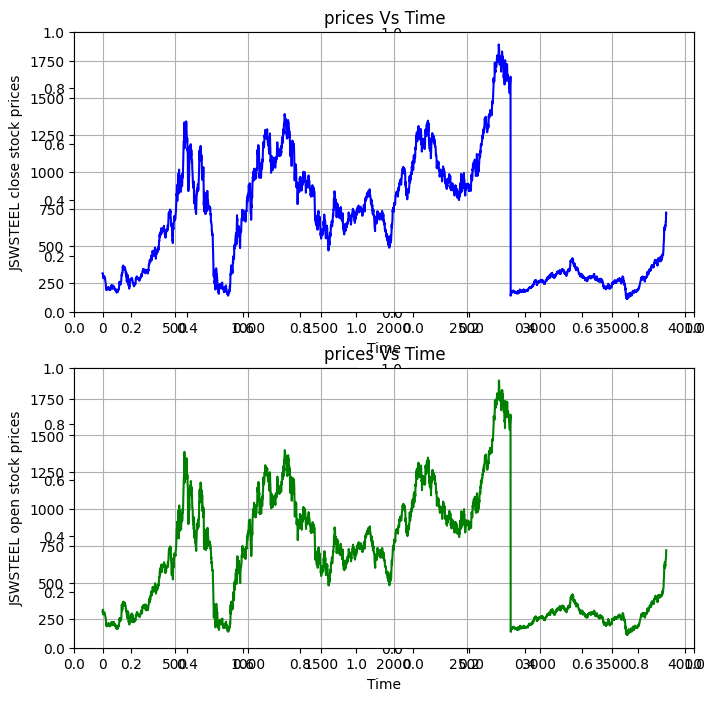

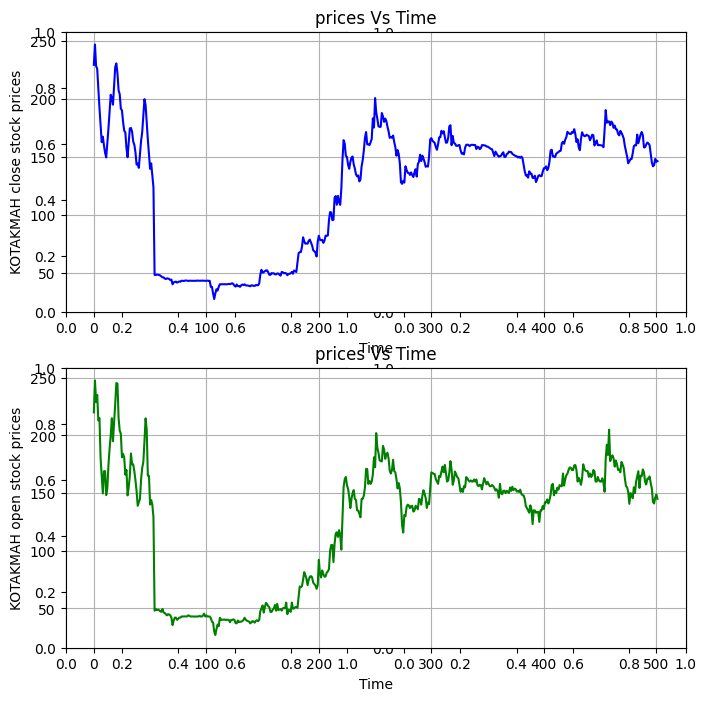

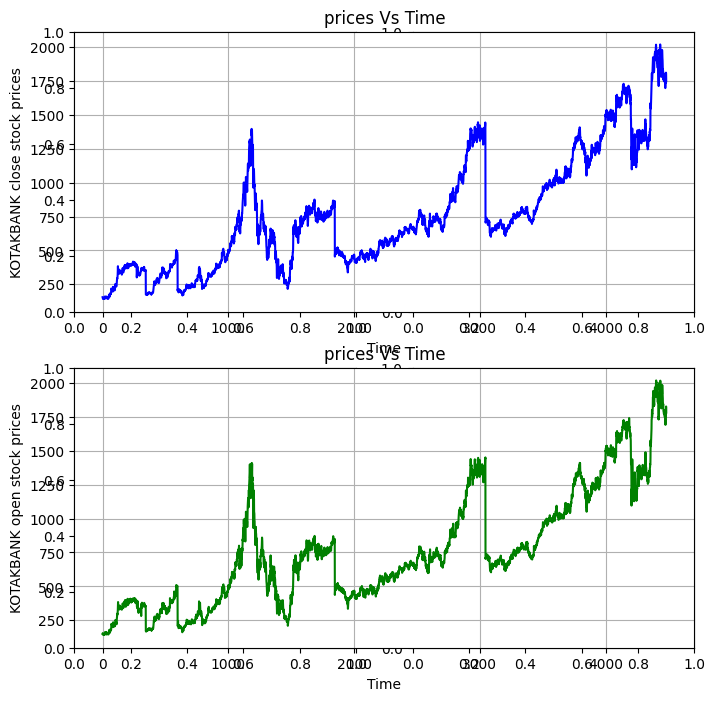

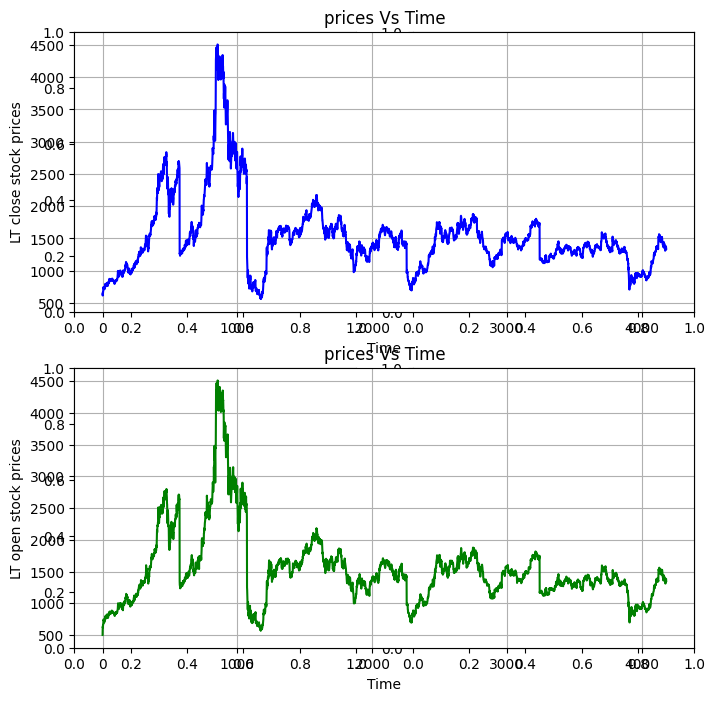

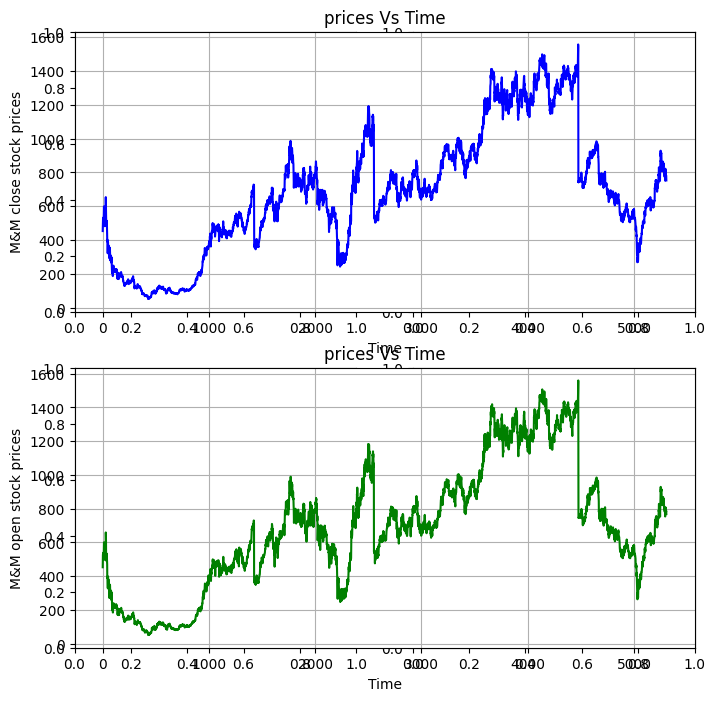

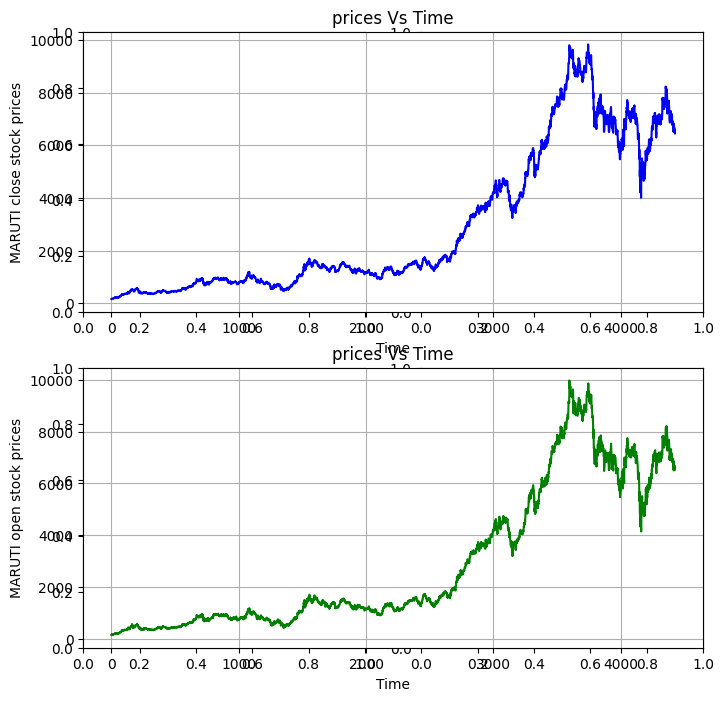

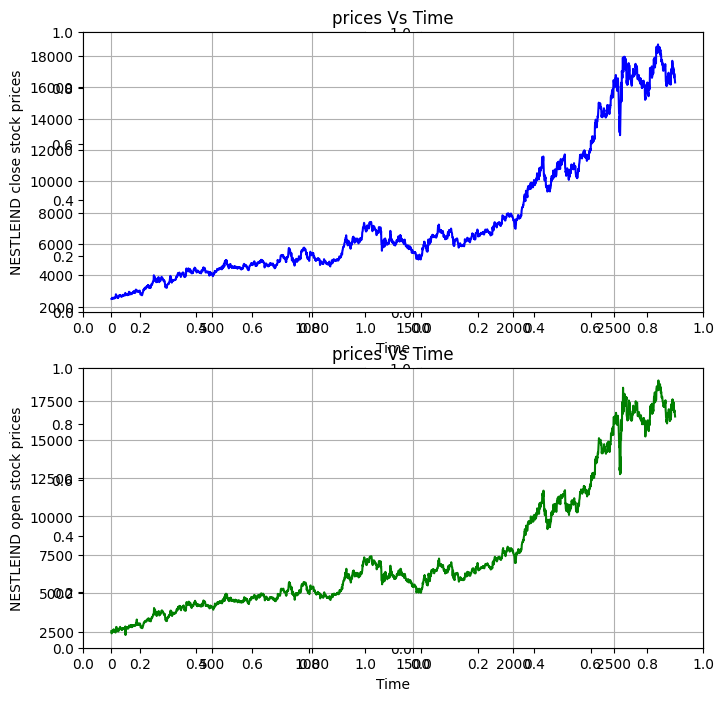

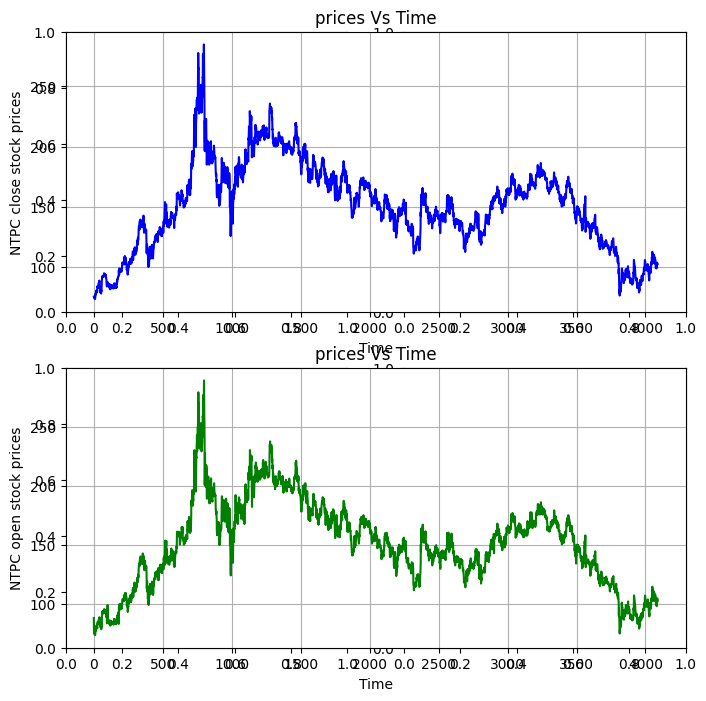

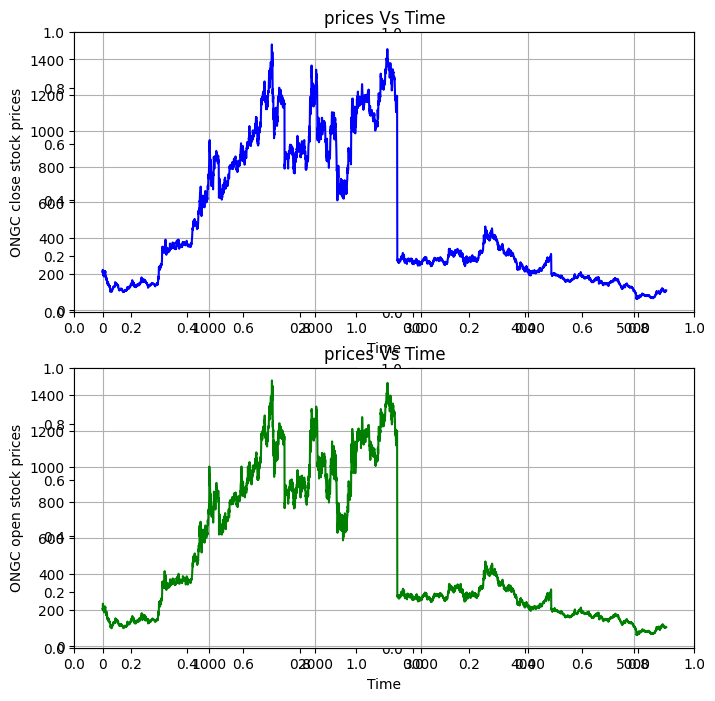

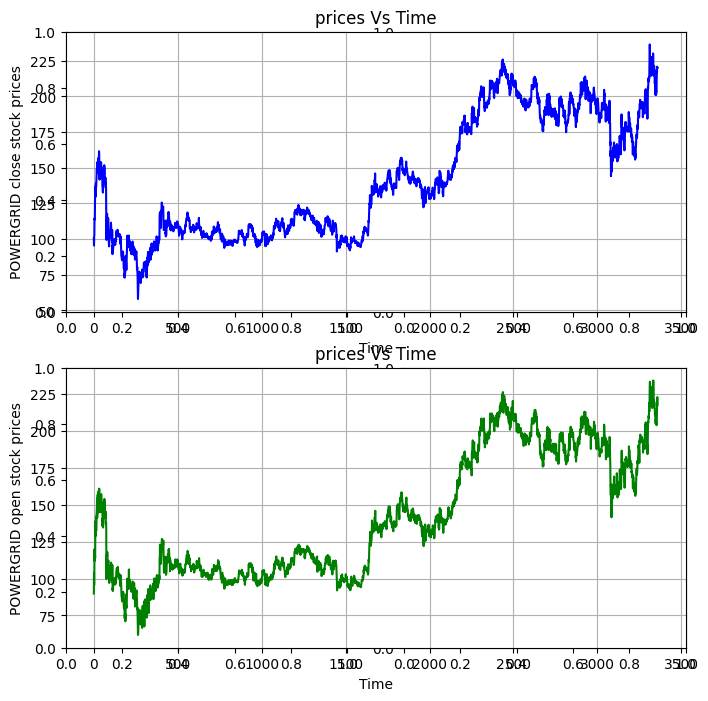

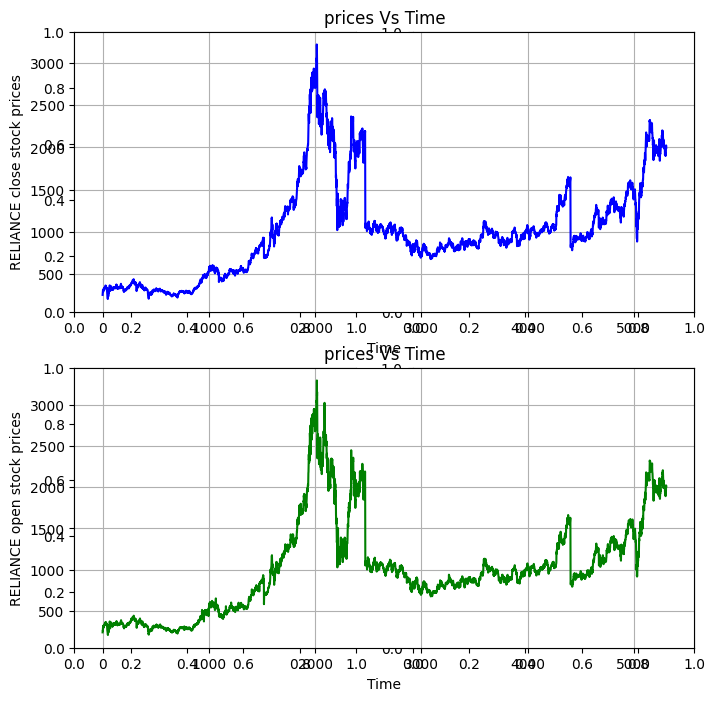

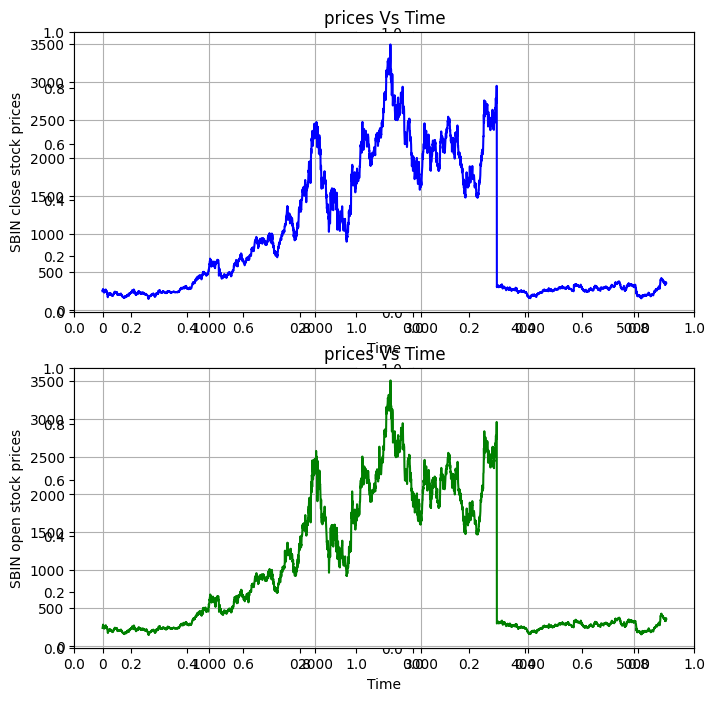

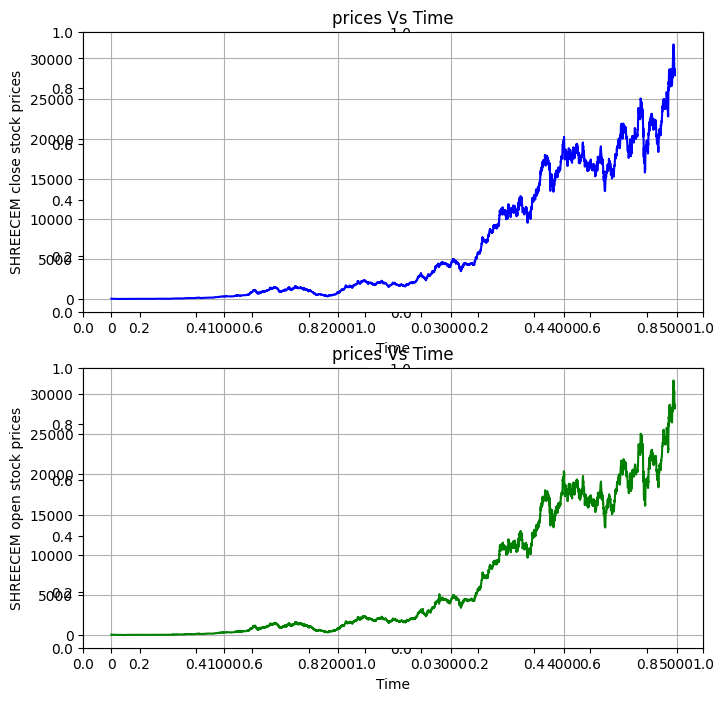

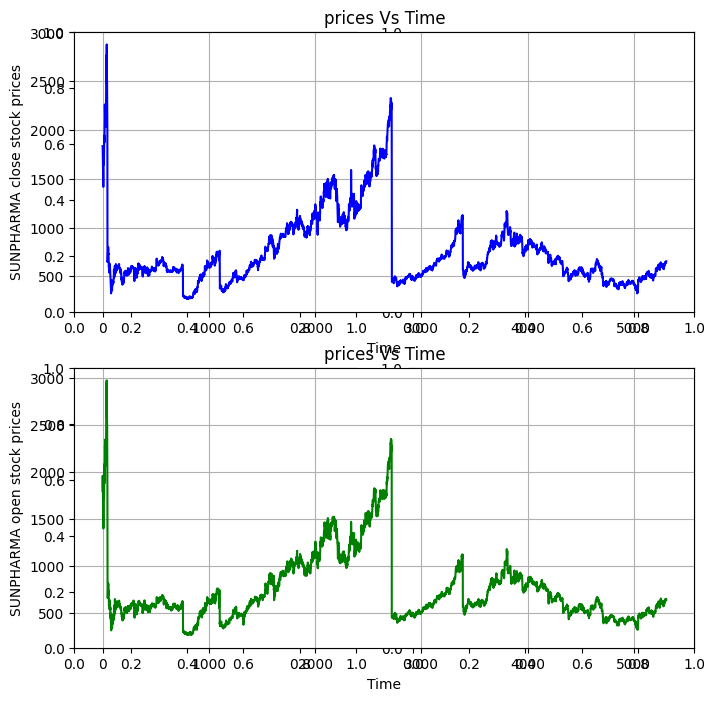

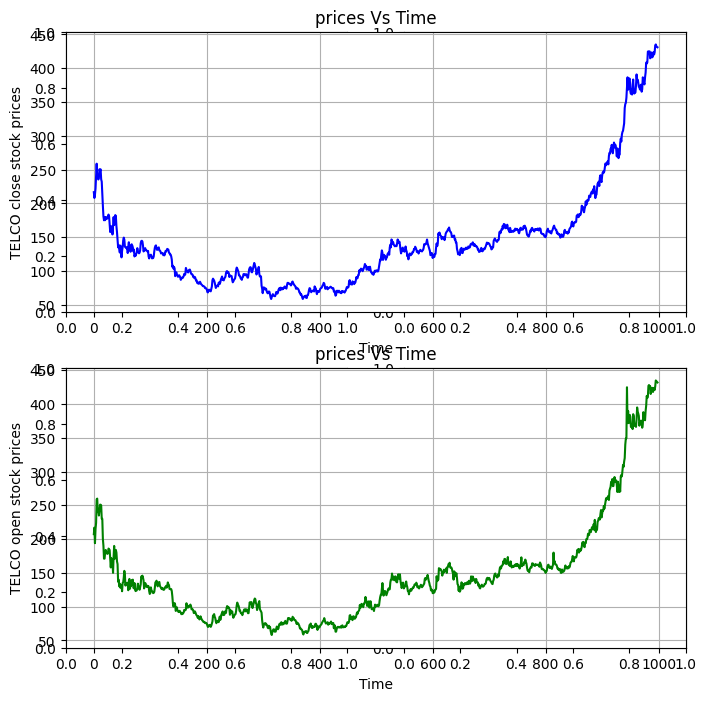

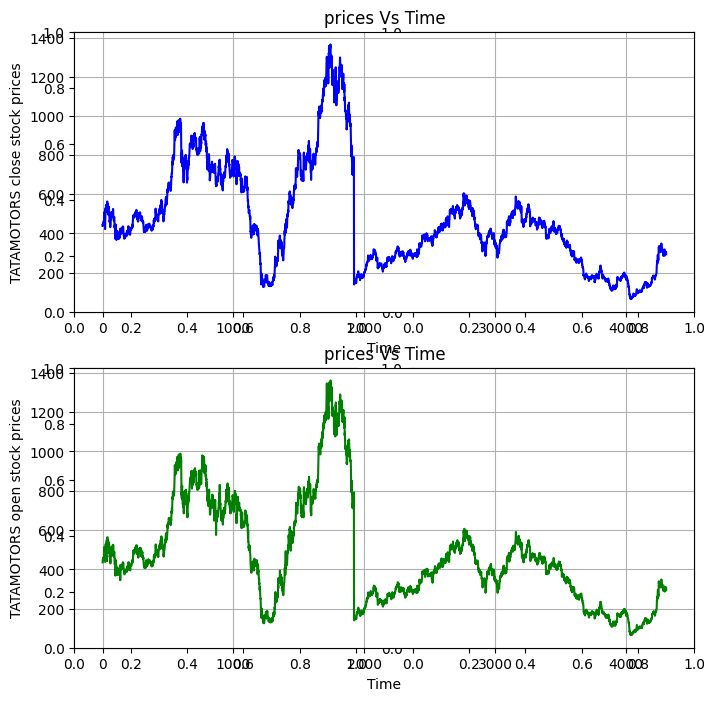

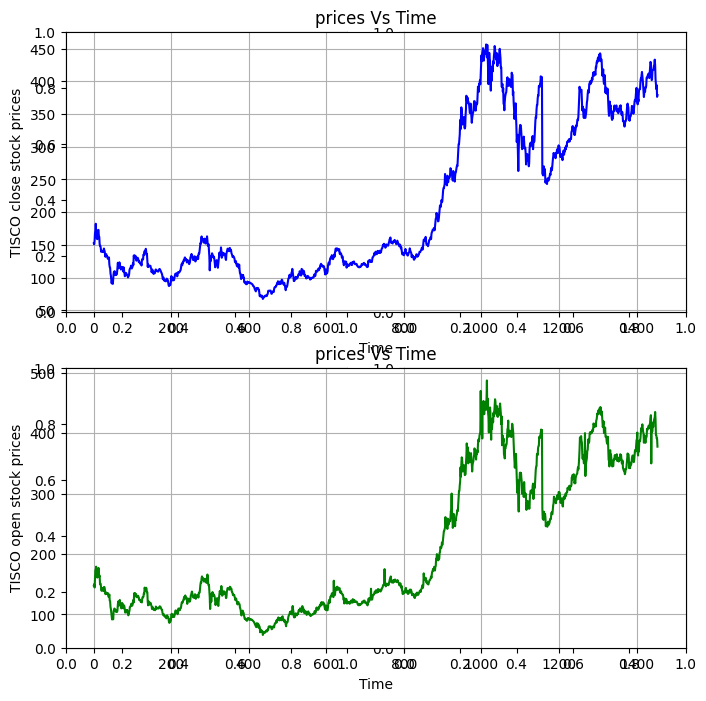

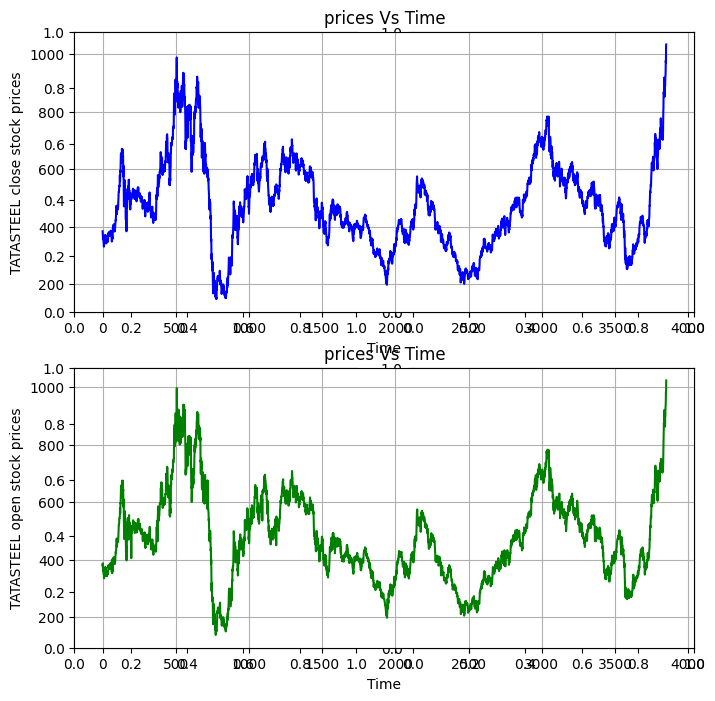

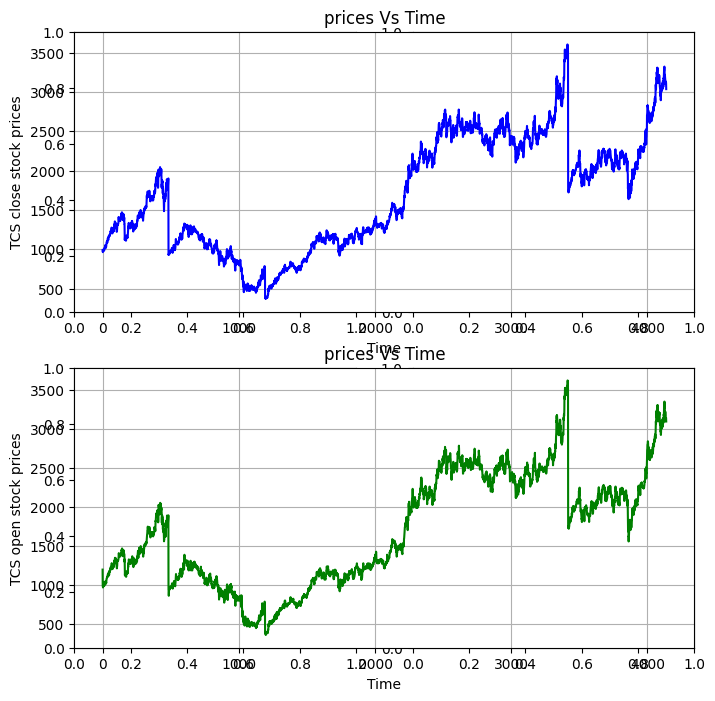

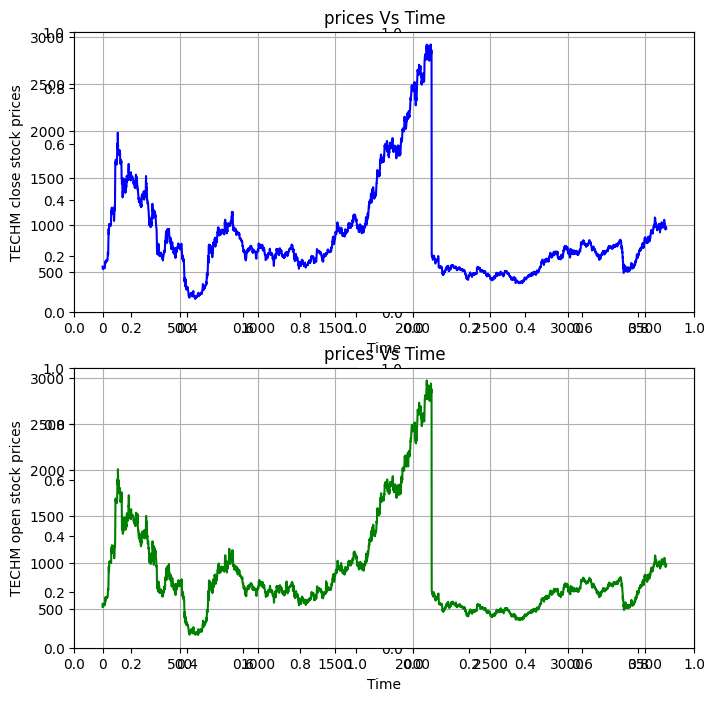

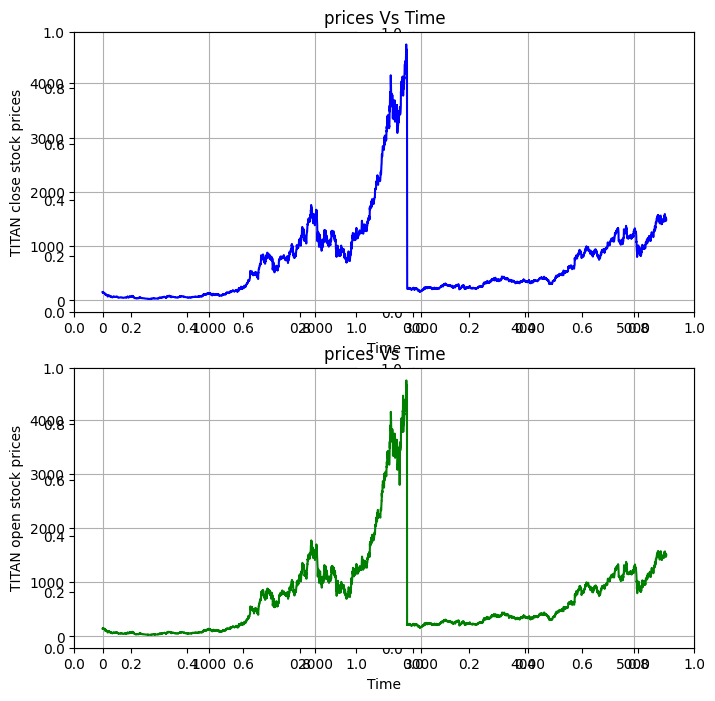

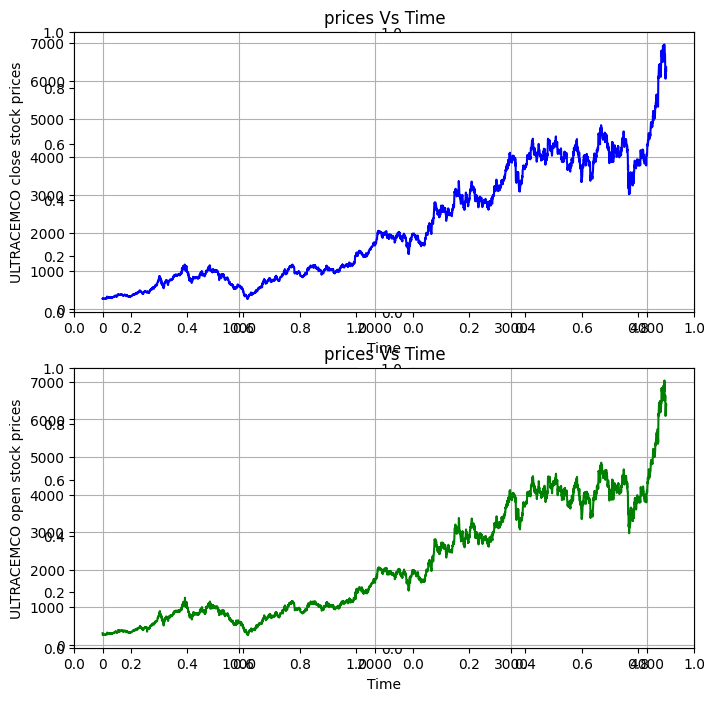

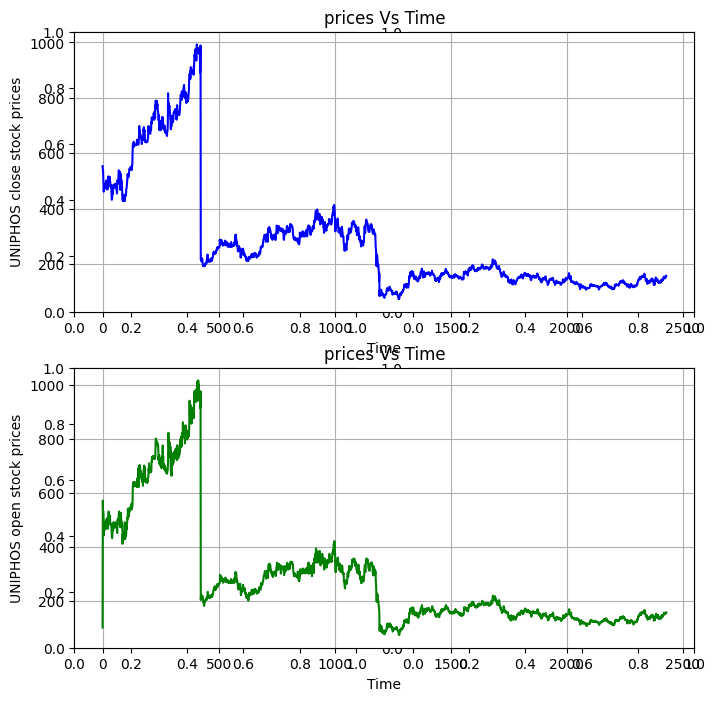

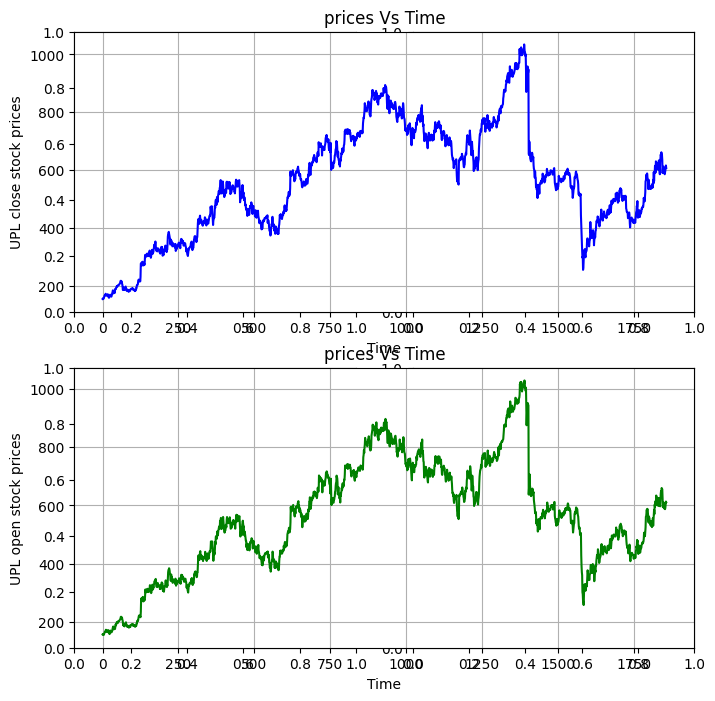

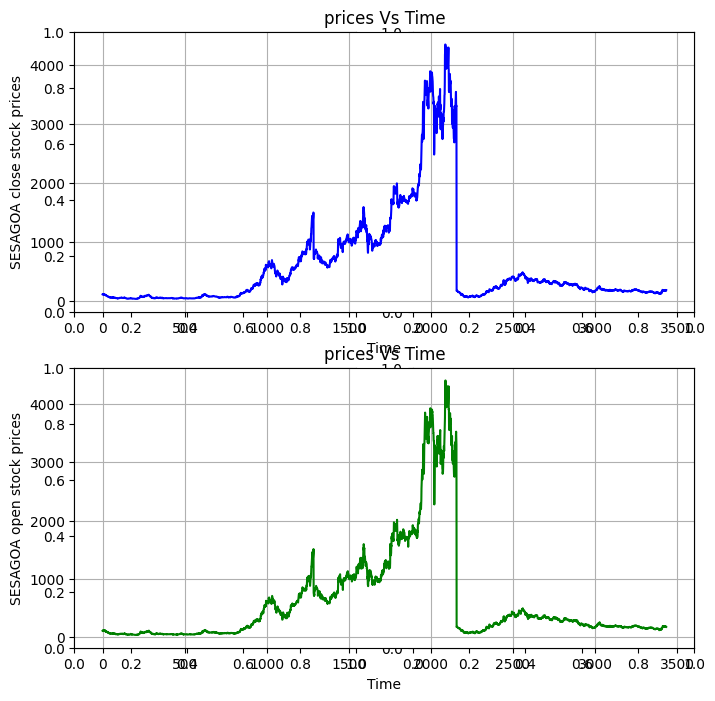

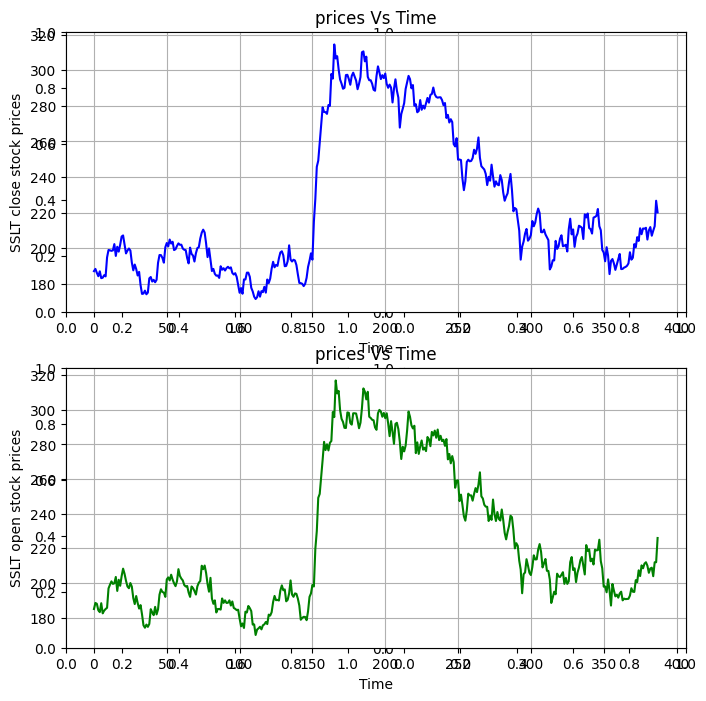

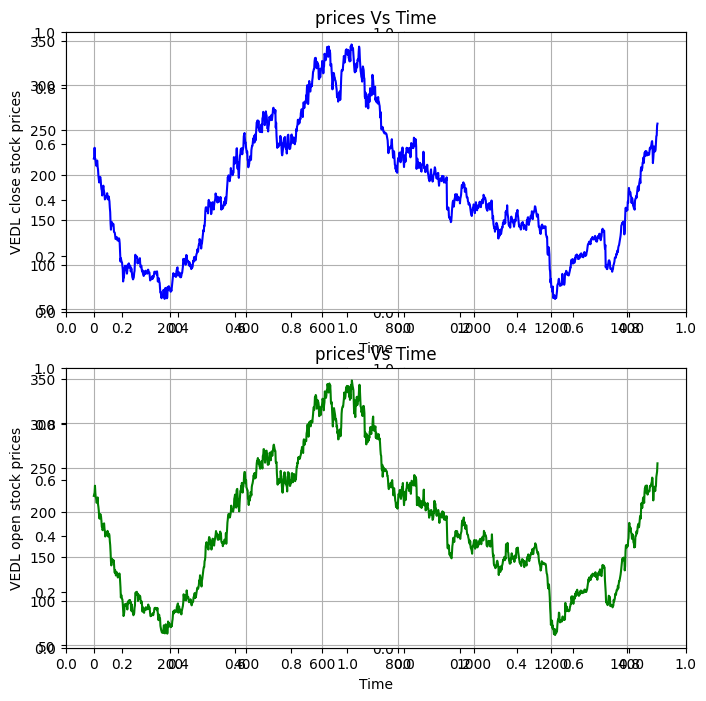

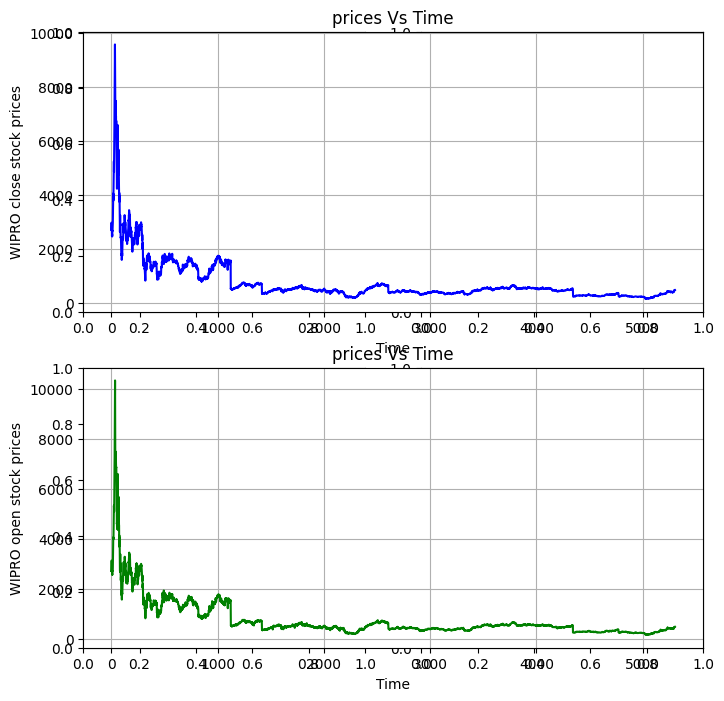

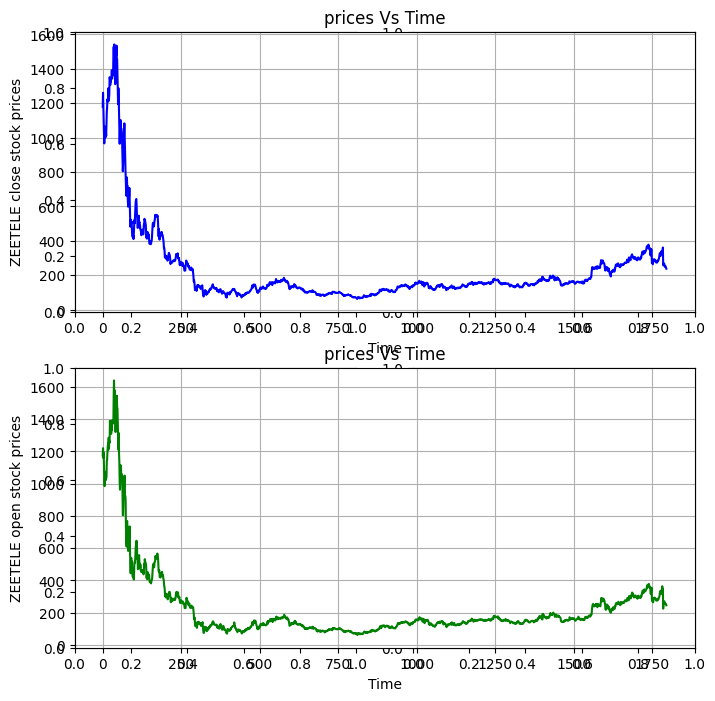

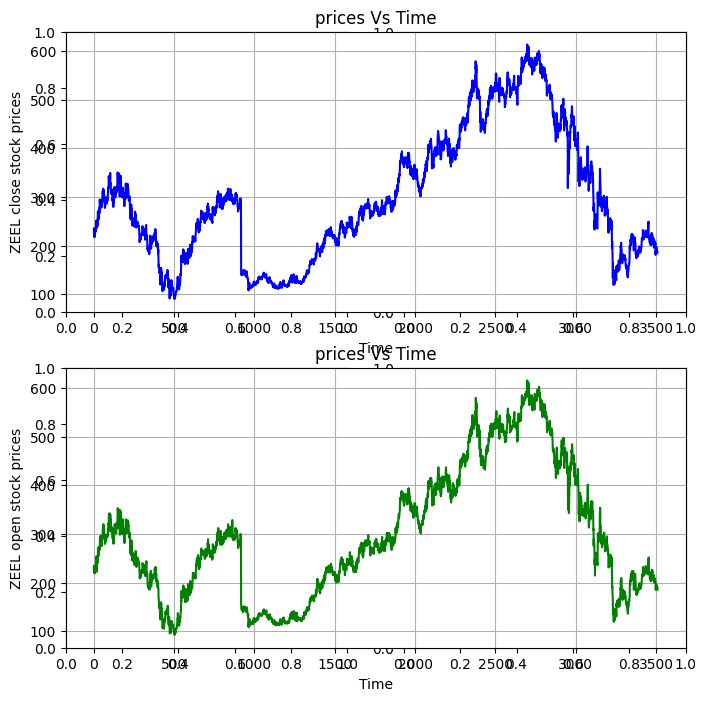

In [120]:
def plotter(code):
    global closing_stock ,opening_stock
    f, axs = plt.subplots(2,2,figsize=(8,8))
    plt.subplot(212)
    company = df[df['Symbol']==code]
    company = company.Open.values.astype('float32')
    company = company.reshape(-1, 1)
    opening_stock = company
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') 
    plt.plot(company , 'g') 
    
    plt.subplot(211)
    company_close = df[df['Symbol']==code]
    company_close = company_close.Close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b') 
    plt.show() 

    
for i in comp_plot:
    plotter(i)

In [121]:
closing_stock[:,0]

array([235.35, 224.9 , 222.2 , ..., 189.1 , 186.55, 185.6 ], dtype=float32)

In [122]:
stocks = closing_stock[: , 0]
print(stocks)
stocks = stocks.reshape(len(stocks) , 1)

[235.35 224.9  222.2  ... 189.1  186.55 185.6 ]


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 

In [124]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train 

In [125]:
print(train , test)

2808 702


In [126]:
train = stocks[0:train]
print(train)

[[0.27708197]
 [0.25709915]
 [0.25193614]
 ...
 [0.9088823 ]
 [0.8960703 ]
 [0.9017114 ]]


In [127]:
test = stocks[len(train) : ]

In [128]:
#reshaping train data in 1D array form
train = train.reshape(len(train) , 1)
test = test.reshape(len(test) , 1)

In [129]:
print(train.shape , test.shape)

(2808, 1) (702, 1)


In [130]:
def process_data(data , n_features):
    dataX, dataY = [], [] 
    for i in range(len(data)-n_features-1): 
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)


In [131]:
n_features = 2
trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [132]:
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(2805, 2) (2805,) (699, 2) (699,)


In [133]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [134]:
import math 
from keras.models import Sequential 
from keras.layers import Dense , BatchNormalization , Dropout , Activation
from keras.layers import LSTM , GRU 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from keras.optimizers import Adam , SGD , RMSprop 

In [135]:
filepath="model/stock_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [136]:
model = Sequential()
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1, 256)            199680    
                                                                 
 dropout_6 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741505 (2.83 MB)
Trainable params: 74150

In [137]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [138]:
 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 1: val_loss improved from -inf to 0.01066, saving model to model\stock_weights.hdf5
22/22 [==============================] - 10s 94ms/step - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0107 - val_mean_squared_error: 0.0107 - lr: 0.0010
Epoch 2/100
21/22 [===========================>..] - ETA: 0s - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 2: val_loss did not improve from 0.01066
22/22 [==============================] - 1s 28ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 3: val_loss did not improve from 0.01066
22/22 [==============================] - 1s 44ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 8.9315e-04 - val_mean_squared_error: 8.9315e-04 - lr: 0.0010
Epo

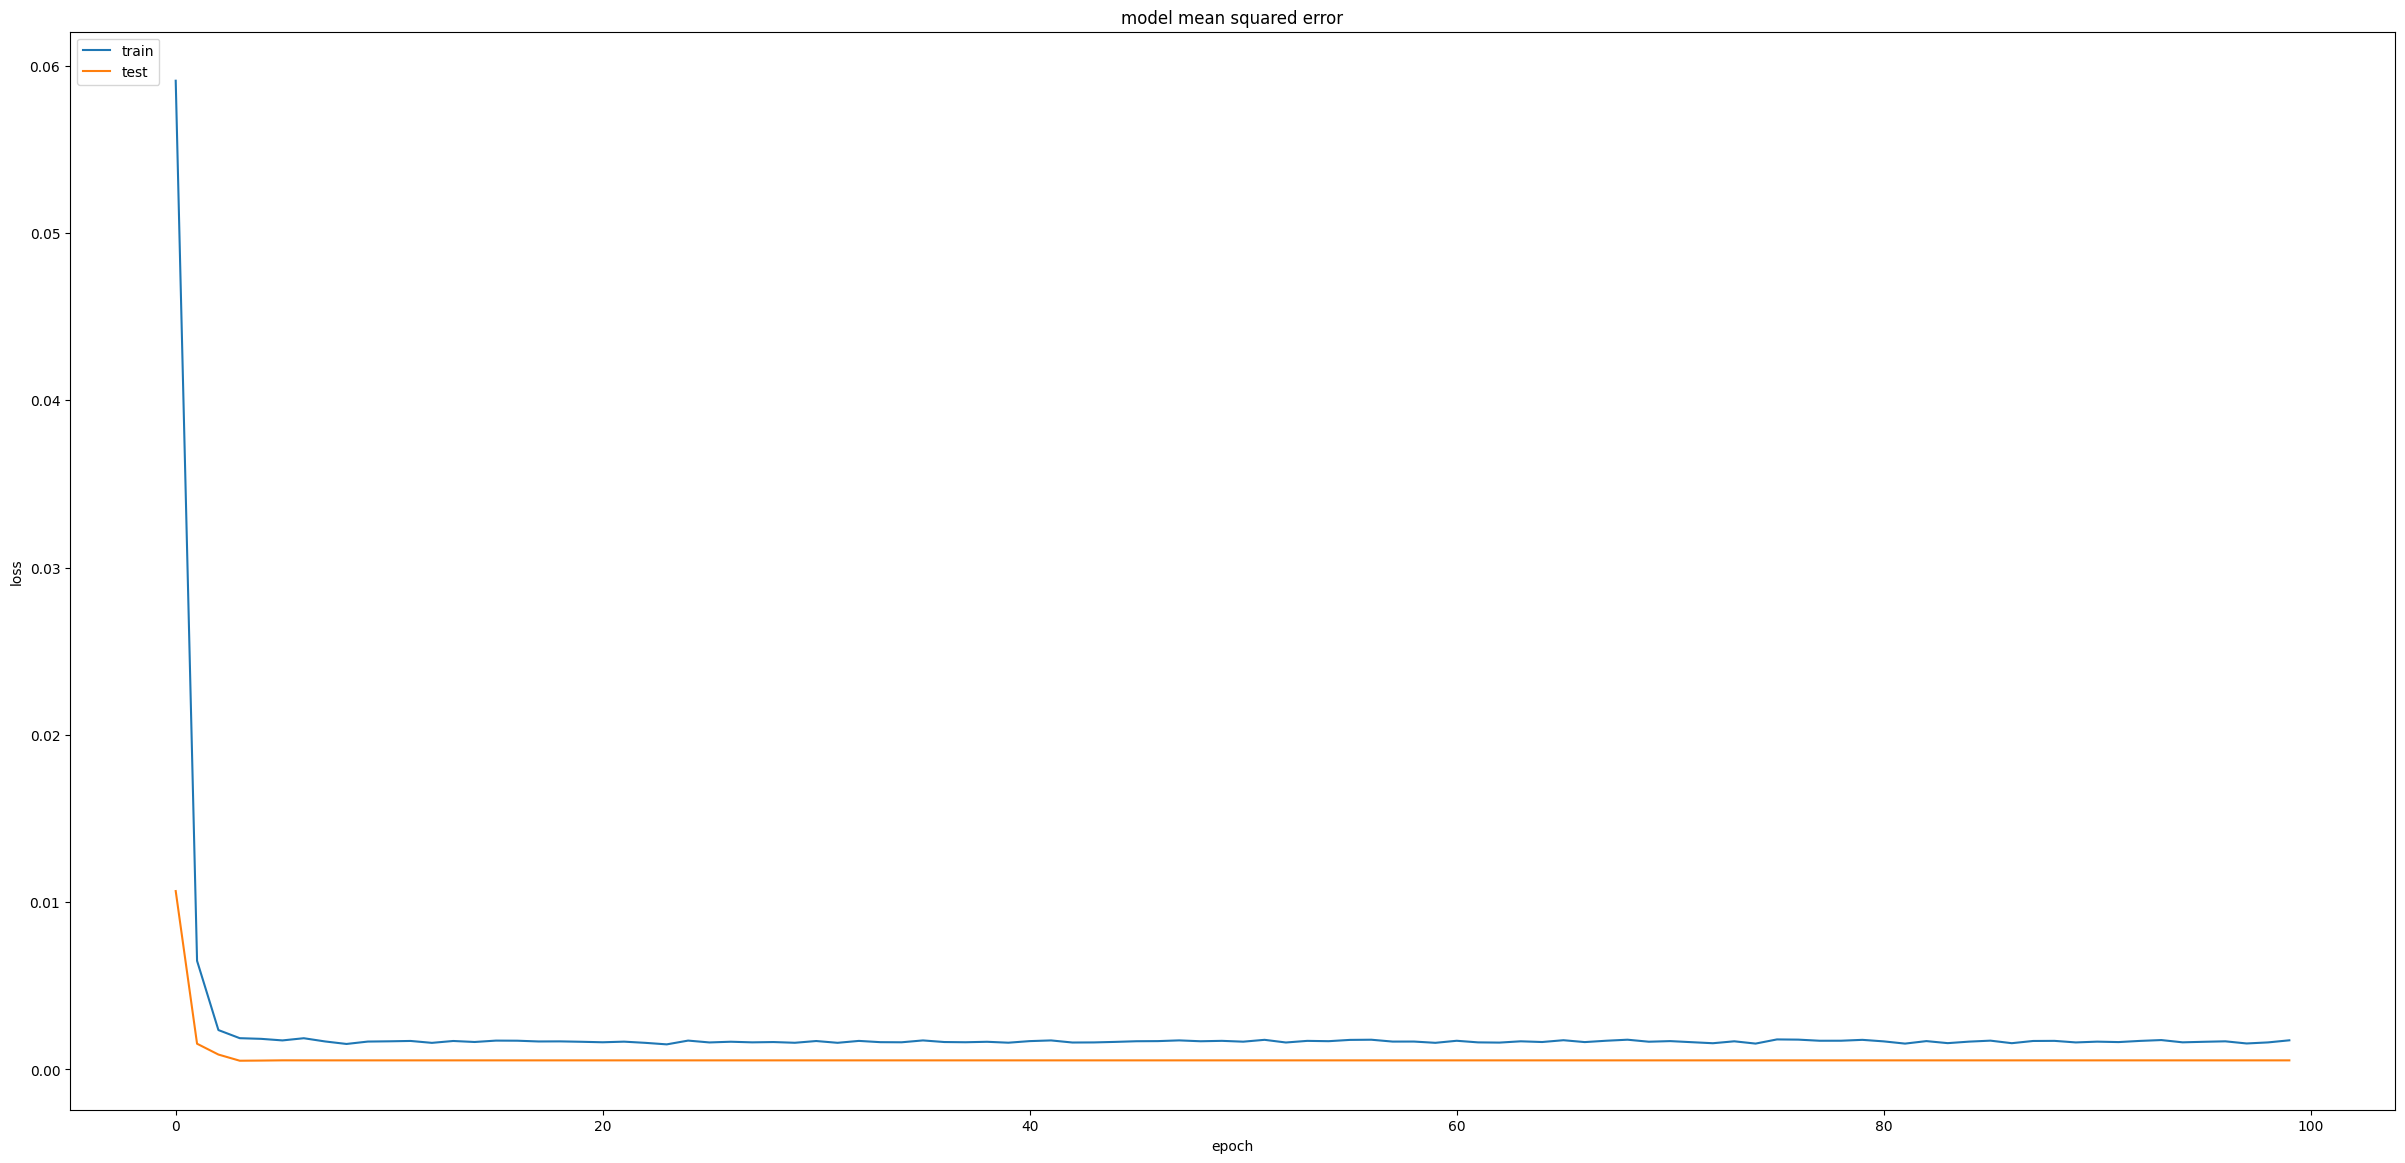

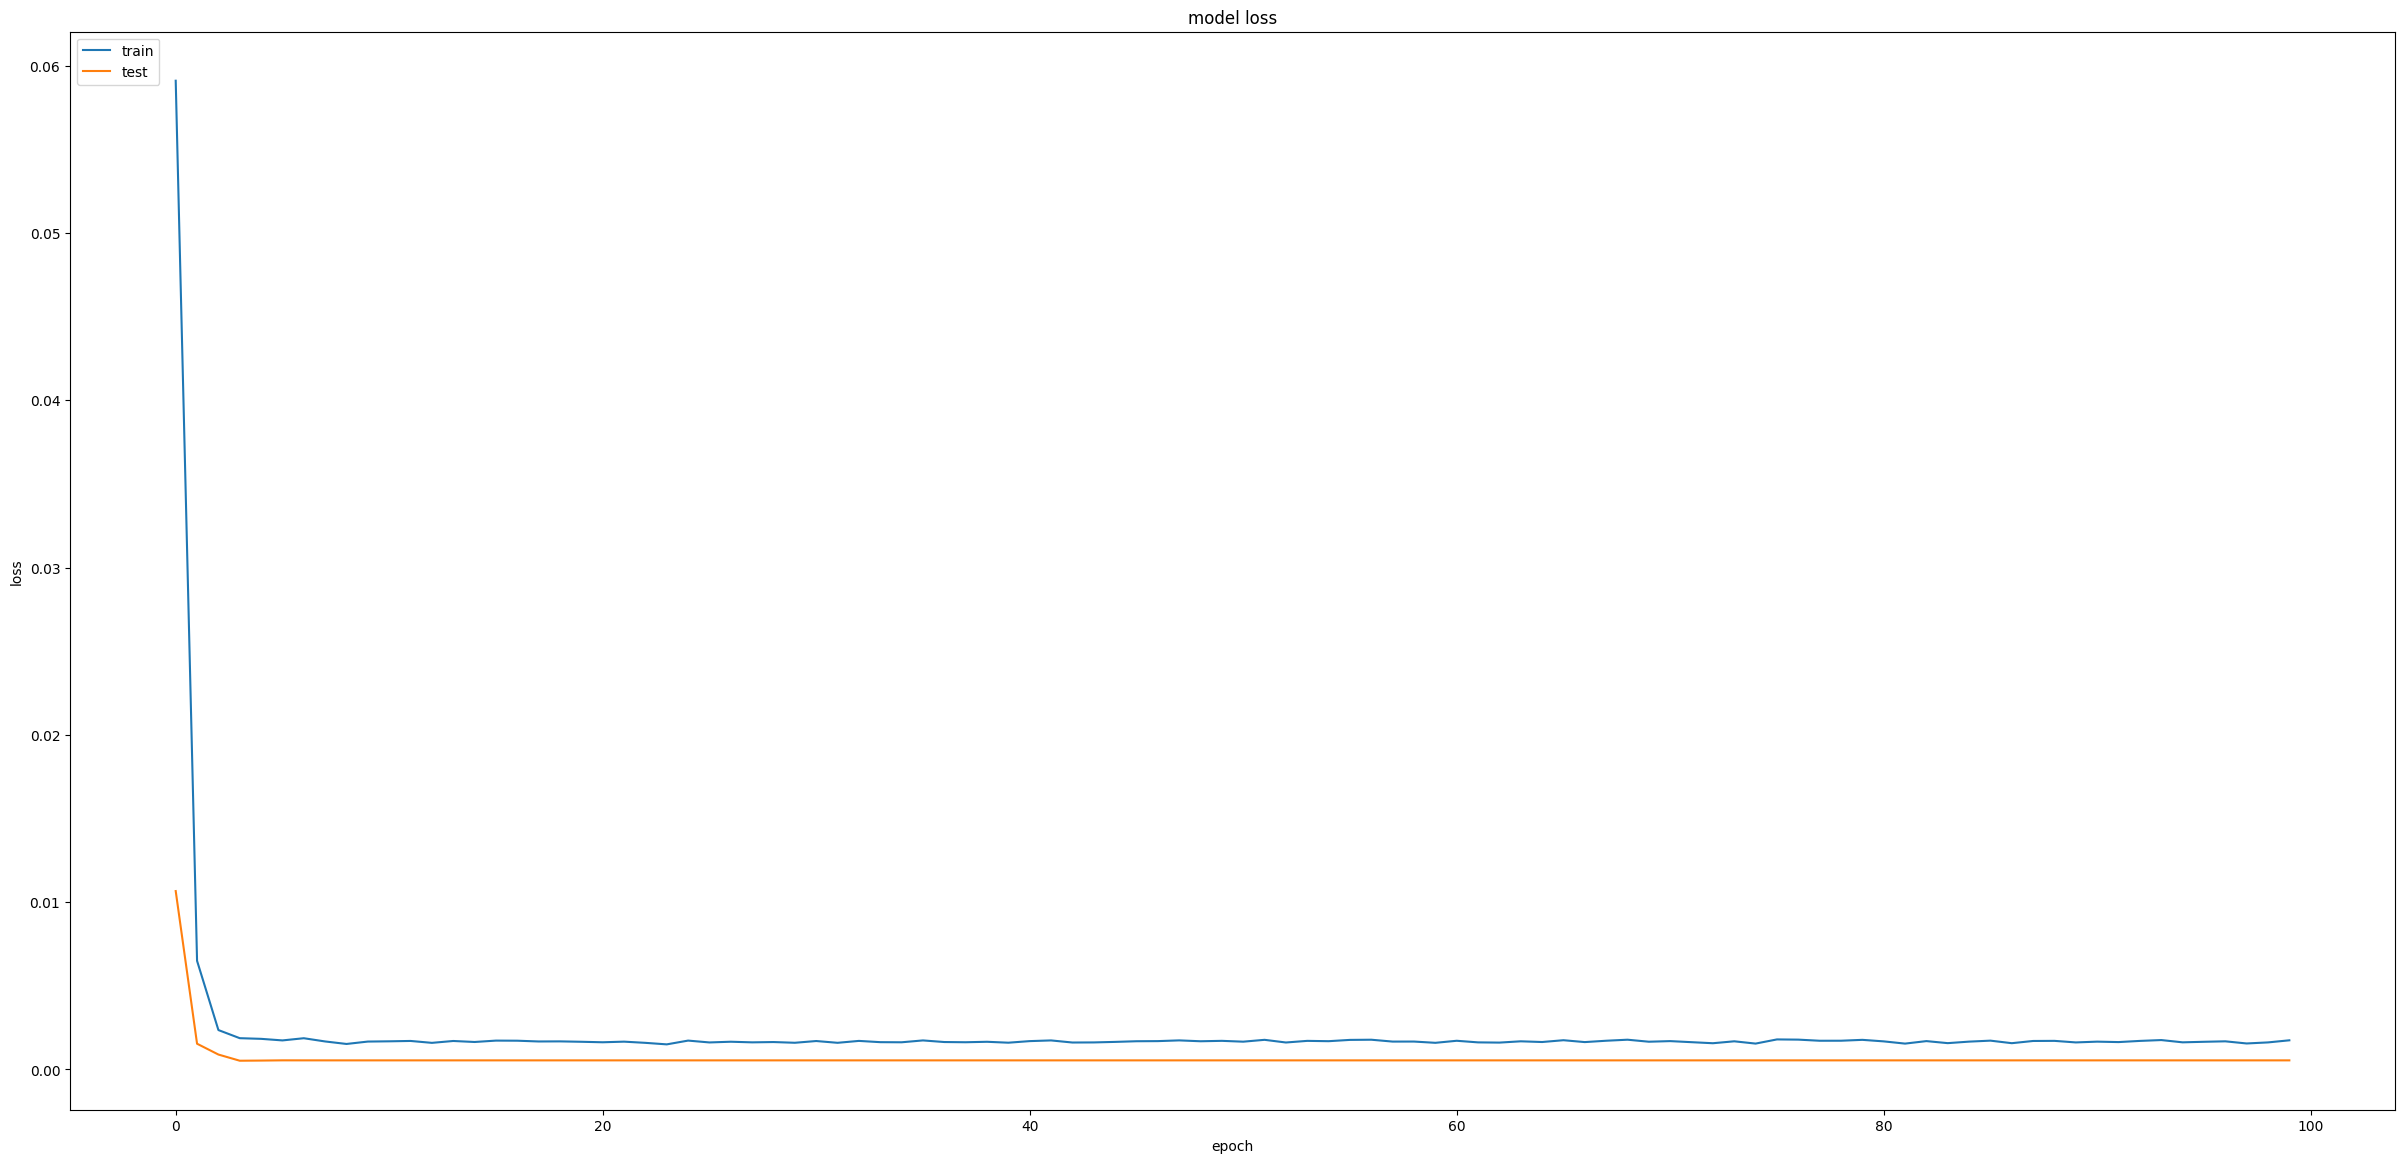

In [139]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

In [144]:
def model_score(model, X_train, y_train, X_test, y_test):
    train_scores = model.evaluate(X_train, y_train, verbose=0)
    
    print('Train Metrics:')
    print('  Loss: %.5f, MSE: %.5f, RMSE: %.2f' % (train_scores[0], train_scores[1], math.sqrt(train_scores[1])))
    
    if len(y_train.shape) == 1:
        train_predictions = model.predict(X_train)
        train_accuracy = r2_score(y_train, train_predictions)
        print('  r2 score: %.2f%%' % (train_accuracy * 100))
    
    test_scores = model.evaluate(X_test, y_test, verbose=0)
    
    print('\nTest Metrics:')
    print('  Loss: %.5f, MSE: %.5f, RMSE: %.2f' % (test_scores[0], test_scores[1], math.sqrt(test_scores[1])))
    
    if len(y_test.shape) == 1:
        test_predictions = model.predict(X_test)
        test_accuracy = r2_score(y_test, test_predictions)
        print('  r2 score: %.2f%%' % (test_accuracy * 100))
    
    return {'train_loss': train_scores[0], 'train_r2 score': train_accuracy,
            'test_loss': test_scores[0], 'test_r2 score': test_accuracy}

model_score(model, trainX, trainY , testX, testY)

Train Metrics:
  Loss: 0.00029, MSE: 0.00029, RMSE: 0.02
88/88 [==============================] - 1s 9ms/step
  r2 score: 99.58%

Test Metrics:
  Loss: 106203.49219, MSE: 106203.49219, RMSE: 325.89


UnboundLocalError: cannot access local variable 'test_accuracy' where it is not associated with a value

In [141]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

22/22 [==============================] - 0s 7ms/step


array([[536.416  ],
       [536.25525],
       [536.5477 ],
       [537.0197 ],
       [538.2858 ],
       [541.90186],
       [543.1061 ],
       [537.414  ],
       [534.215  ],
       [534.0794 ]], dtype=float32)

In [142]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
testY[:10]

array([[543.95],
       [539.65],
       [544.8 ],
       [542.2 ],
       [551.8 ],
       [544.7 ],
       [540.6 ],
       [538.4 ],
       [540.3 ],
       [533.6 ]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


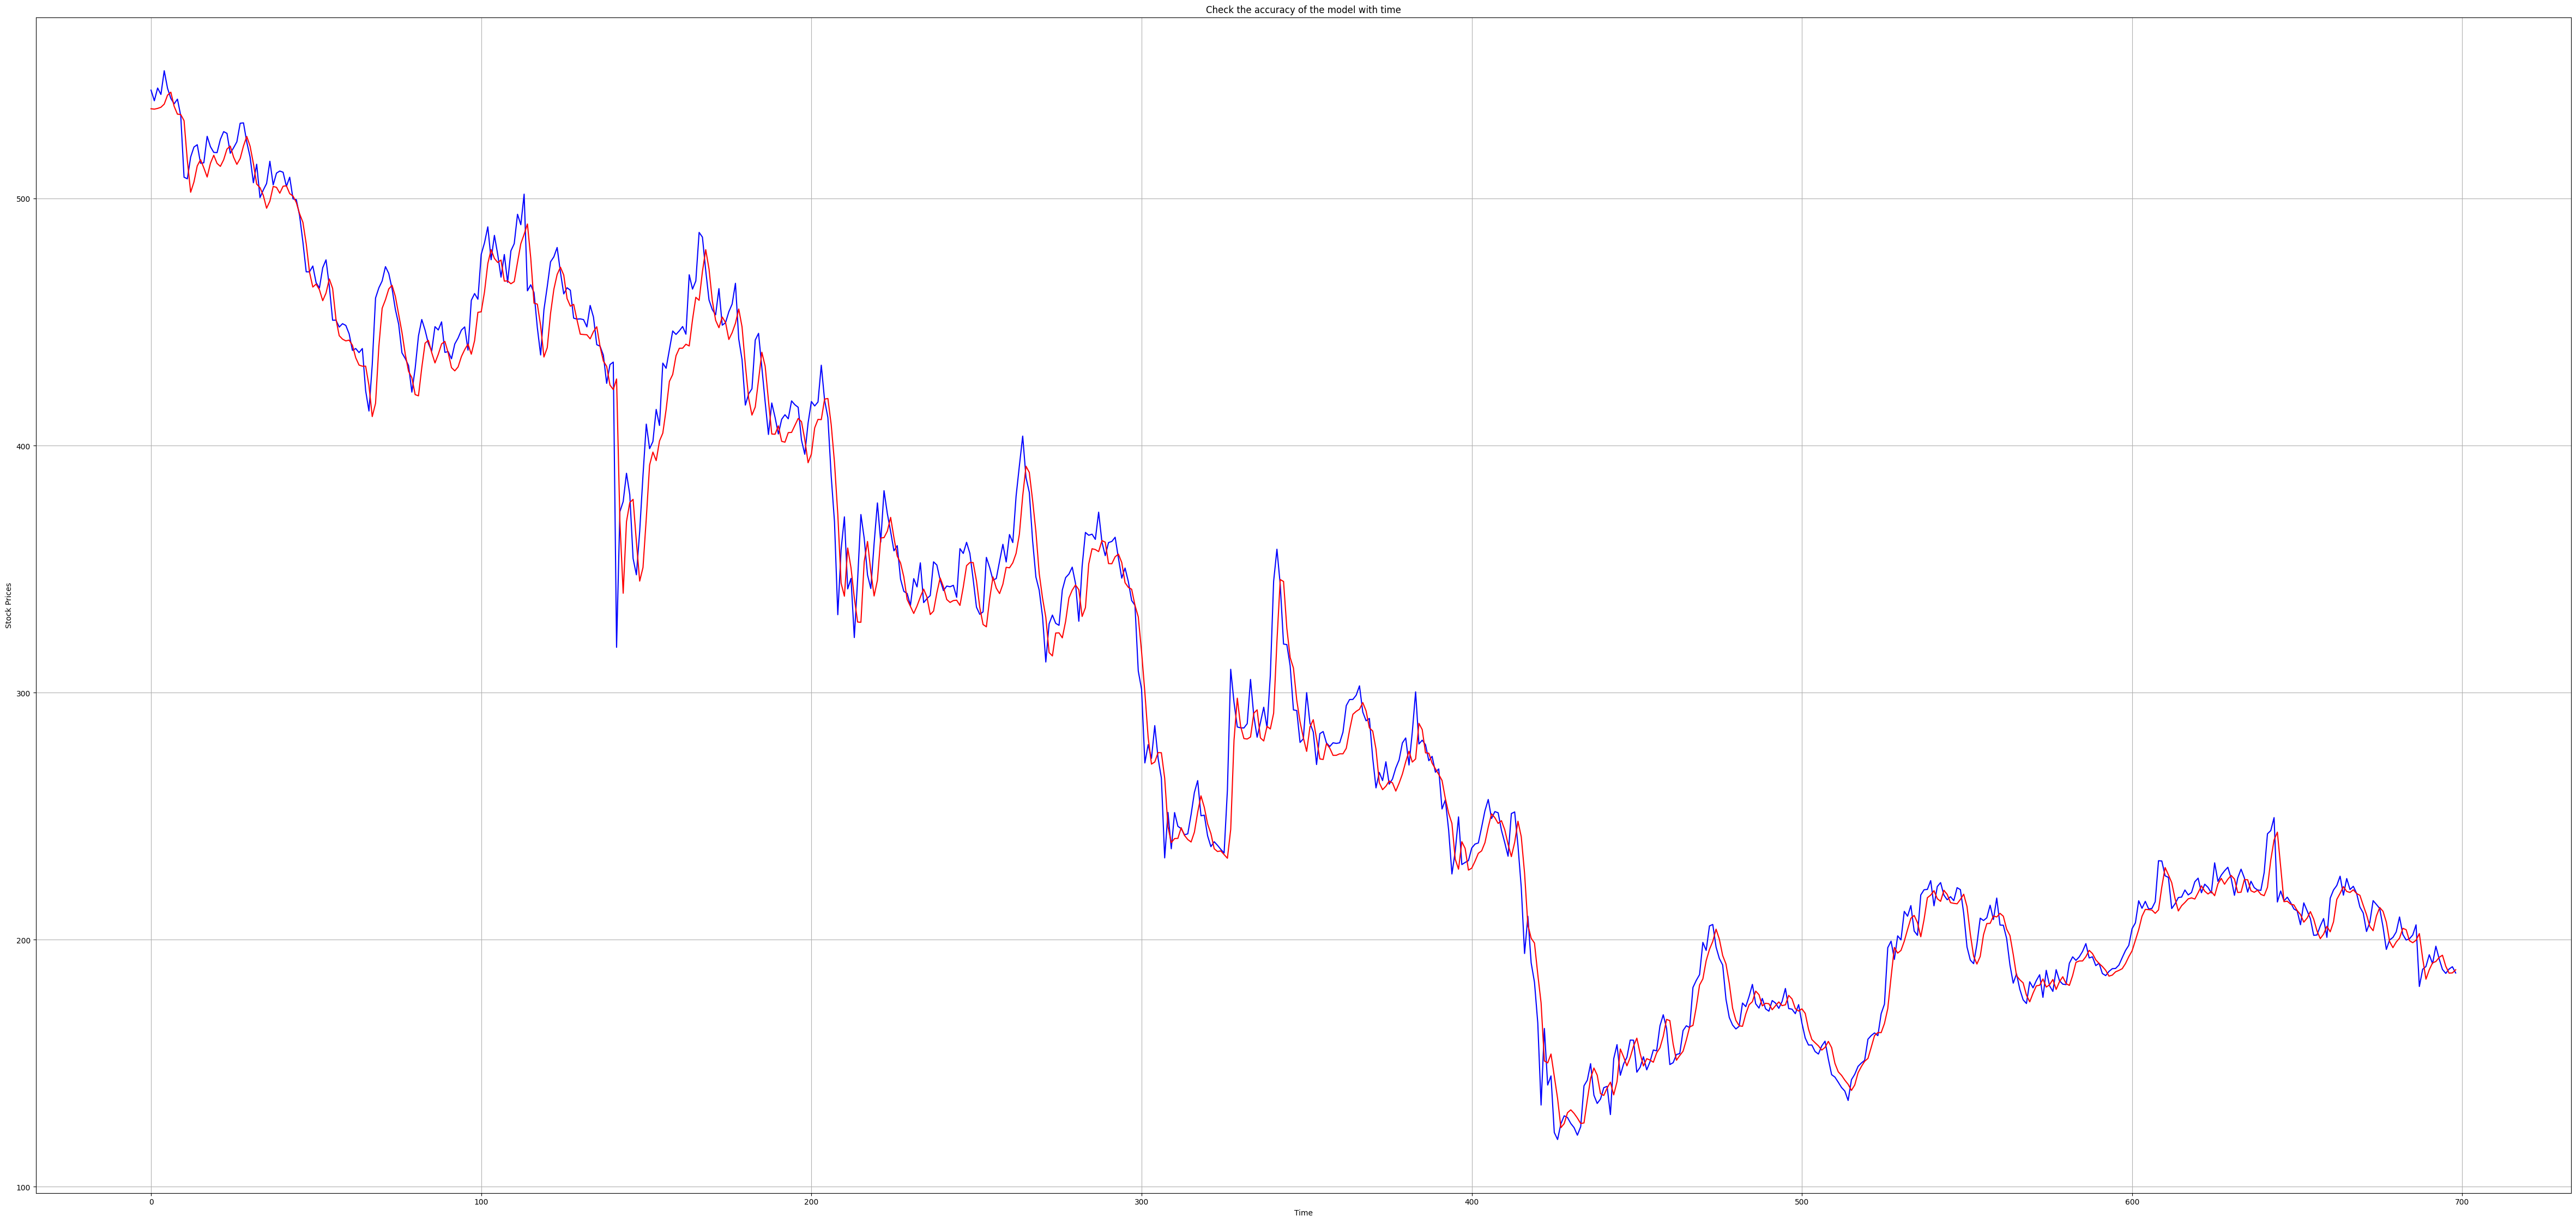

In [147]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (60,28)
plt.plot(testY , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()